In [2]:
import os
import math
import numpy as np
import datetime as dt
import time
import pandas as pd
import matplotlib.pyplot as plt

# Outlier Removal

In [14]:
data = pd.read_csv('Data/Training_scaled_imputed.csv', index_col=0)
data['default_ind'] = pd.read_csv('Data/TrainingData.csv',index_col=0)['default_ind']
data.describe()

C:\Users\Nithya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,default_ind
count,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,...,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000
mean,-0.035905,-0.021234,-0.001218,-0.001489,-0.000965,-0.035129,-0.026064,-0.111755,-0.081017,-0.001990,...,-0.247598,-0.019666,0.012735,-0.005588,0.051851,0.047195,-0.062717,0.372976,556.021277,0.287410
std,1.002318,0.969302,0.996913,0.996953,0.996852,0.880235,0.956406,0.899428,0.949124,0.997093,...,0.659887,0.617298,1.004462,0.996237,0.968121,0.715700,0.854236,0.483599,1106.953295,0.452557
min,-2.852612,-0.677610,-0.487020,-0.270584,-0.188725,-0.445421,-0.374327,-0.678146,-0.671575,-0.456780,...,-3.313163,-2.938493,-0.886566,-1.044721,-2.626674,-0.242866,-0.283197,0.000000,2.000000,0.000000
25%,-0.764655,-0.585591,-0.487020,-0.270584,-0.188725,-0.418978,-0.333160,-0.601024,-0.617020,-0.439009,...,-0.647496,-0.285270,-0.886566,-0.725897,-0.689613,-0.242866,-0.283197,0.000000,8.000000,0.000000
50%,-0.079214,-0.345876,-0.459071,-0.270584,-0.188725,-0.310167,-0.243848,-0.481134,-0.461301,-0.312441,...,-0.156614,0.034731,-0.351766,-0.247663,0.257884,-0.242866,-0.283197,0.000000,17.000000,0.000000
75%,0.648407,0.169069,0.102373,-0.270584,-0.188725,-0.076829,-0.022598,-0.018919,0.058590,0.057246,...,0.136327,0.315220,0.656120,0.549396,0.912656,0.129434,-0.283197,1.000000,111.000000,1.000000
max,2.135286,19.248302,35.516579,14.840770,28.623236,25.269881,120.149028,28.328041,15.918352,84.875335,...,18.066775,4.492185,4.461442,13.461737,1.193120,23.863570,14.911982,1.000000,3247.000000,1.000000


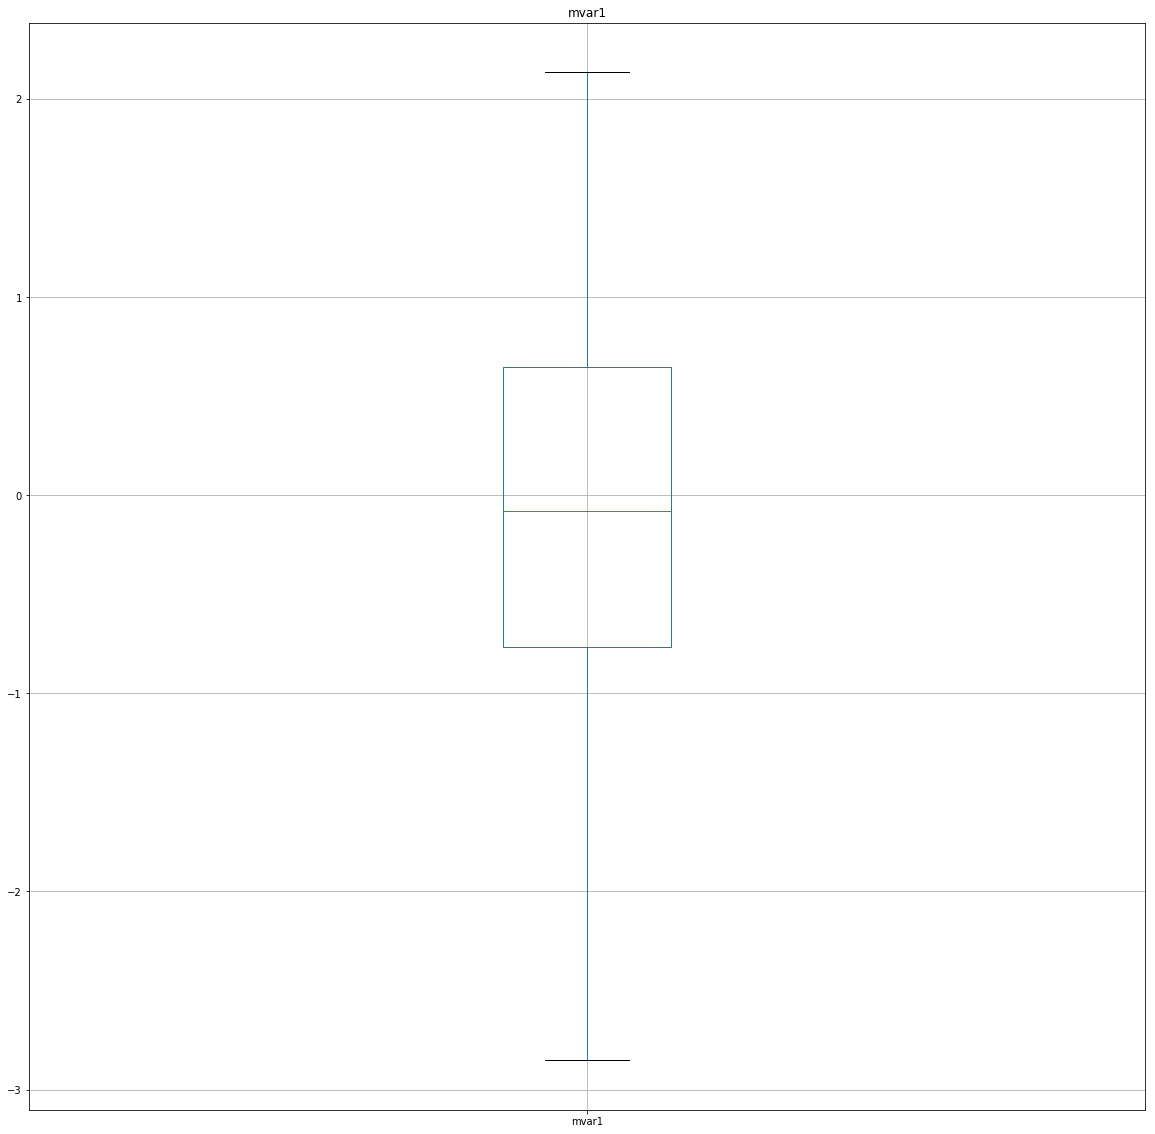

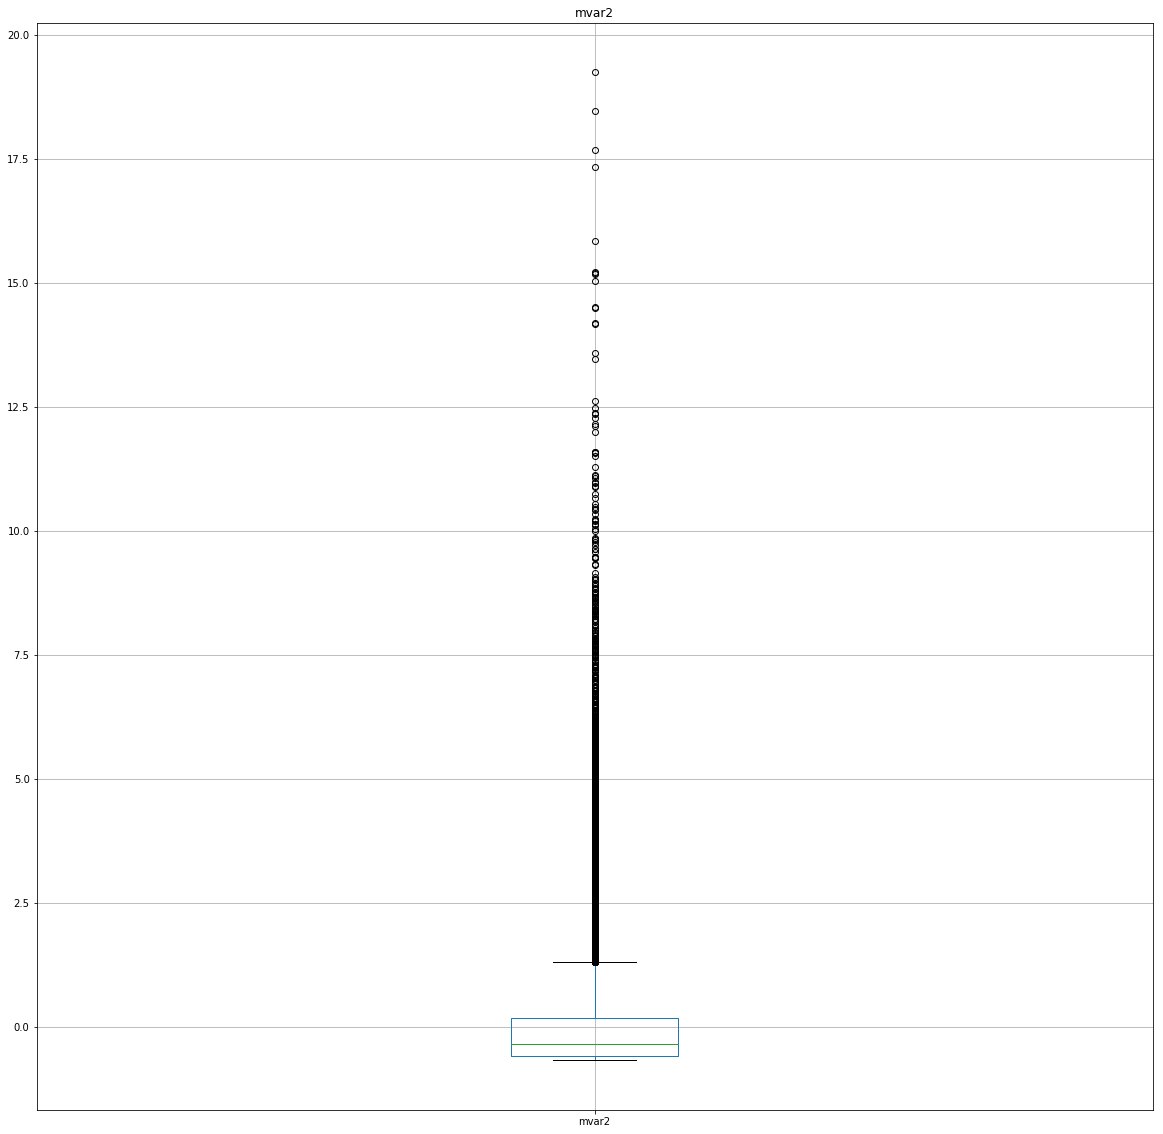

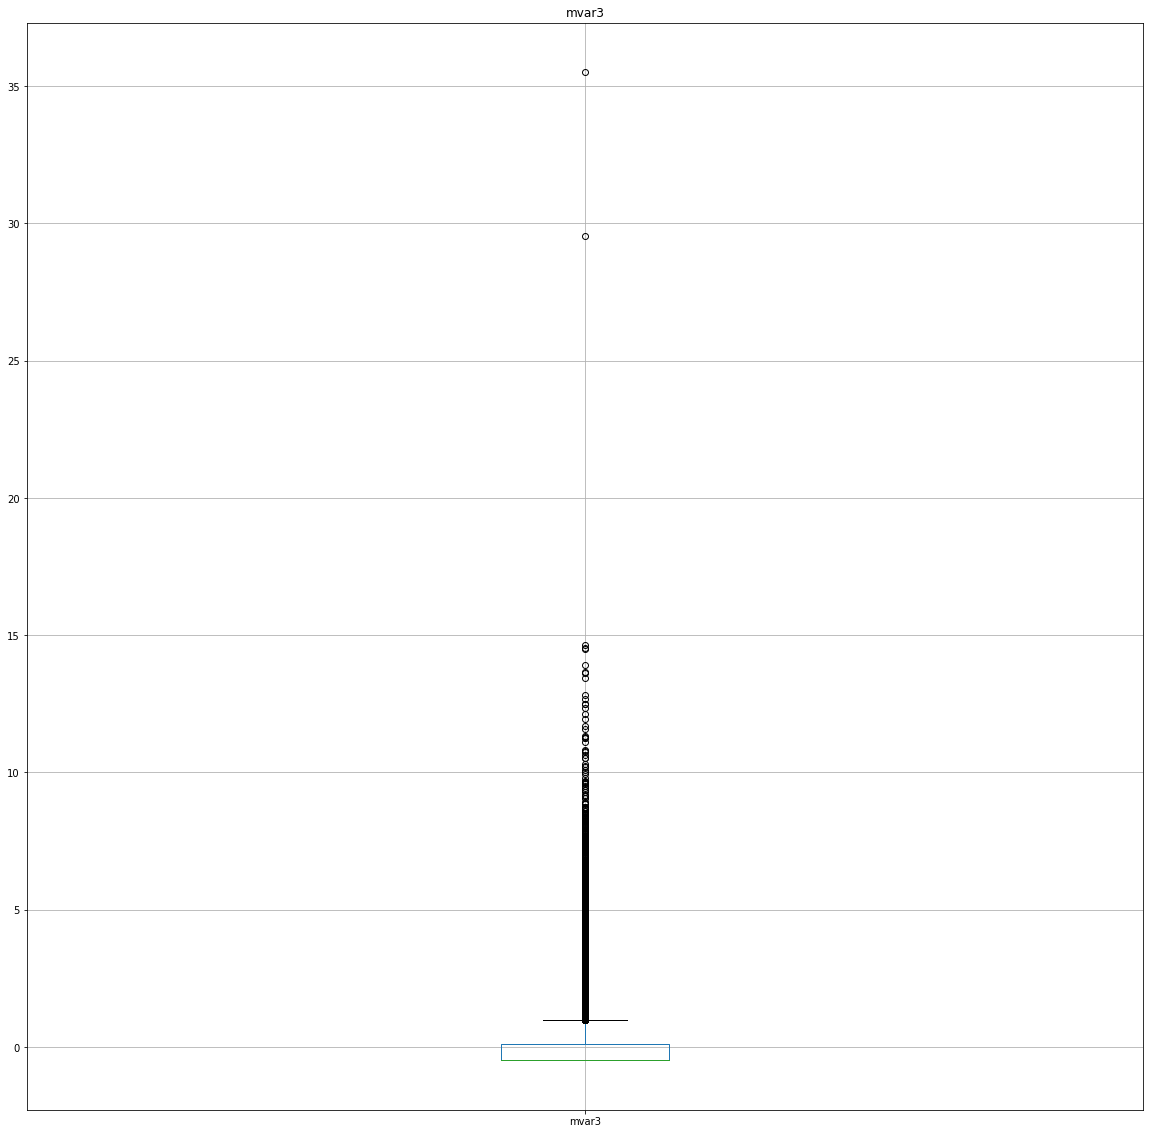

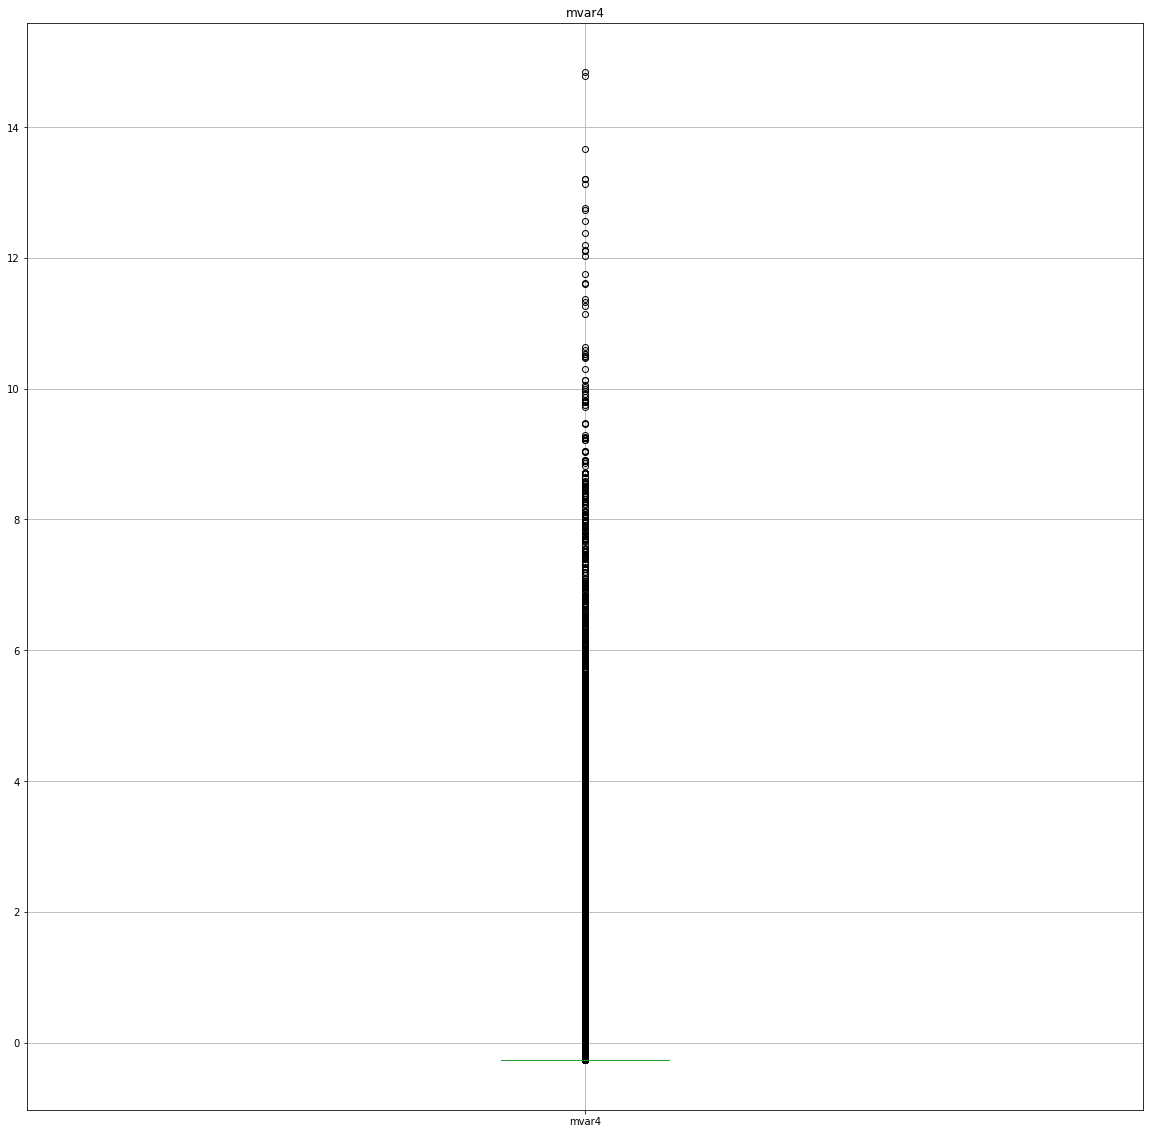

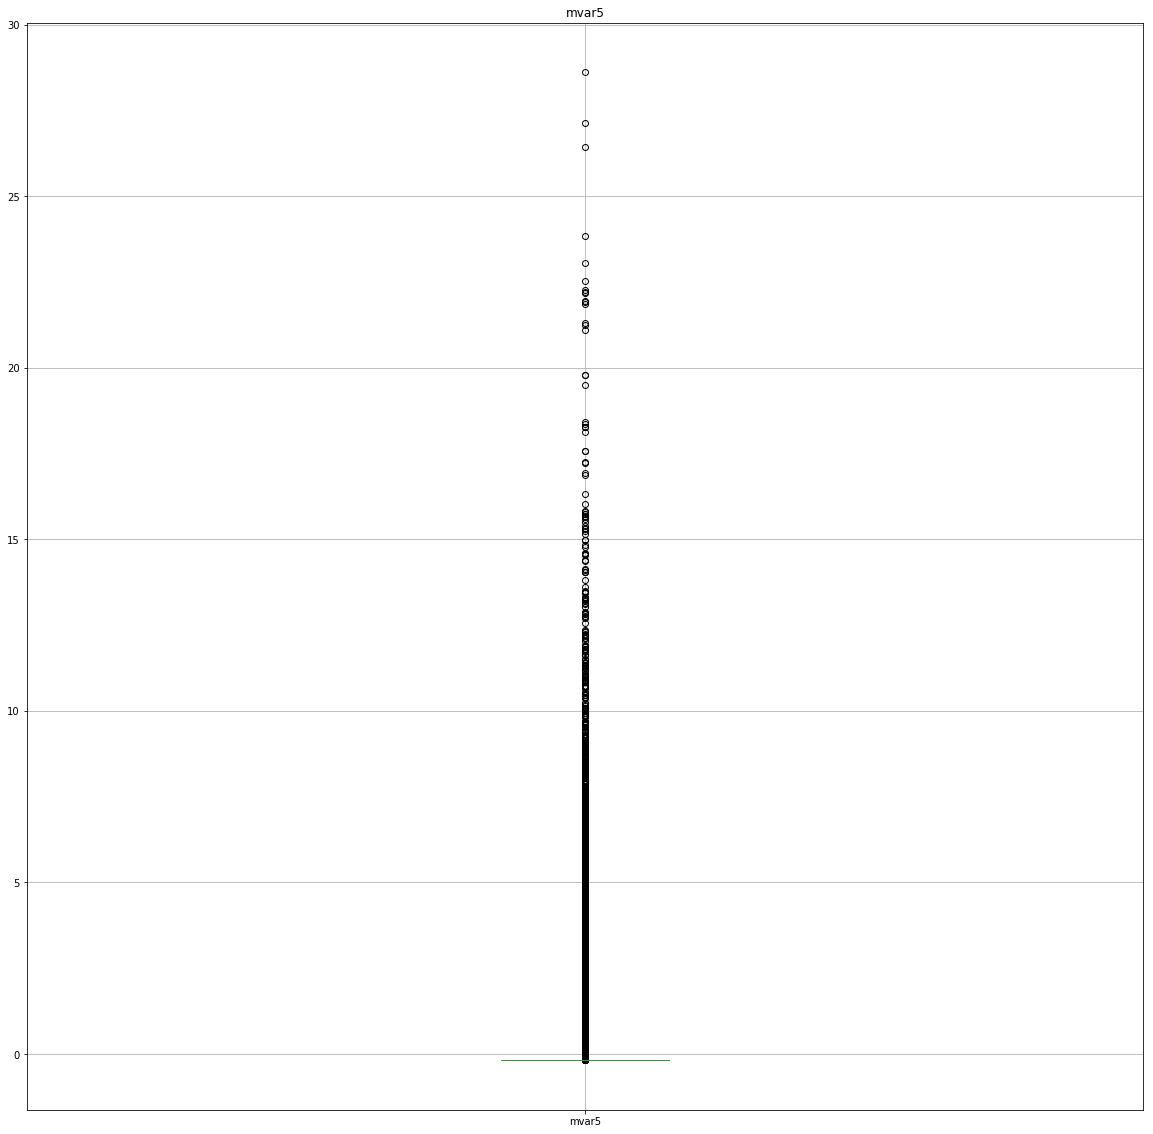

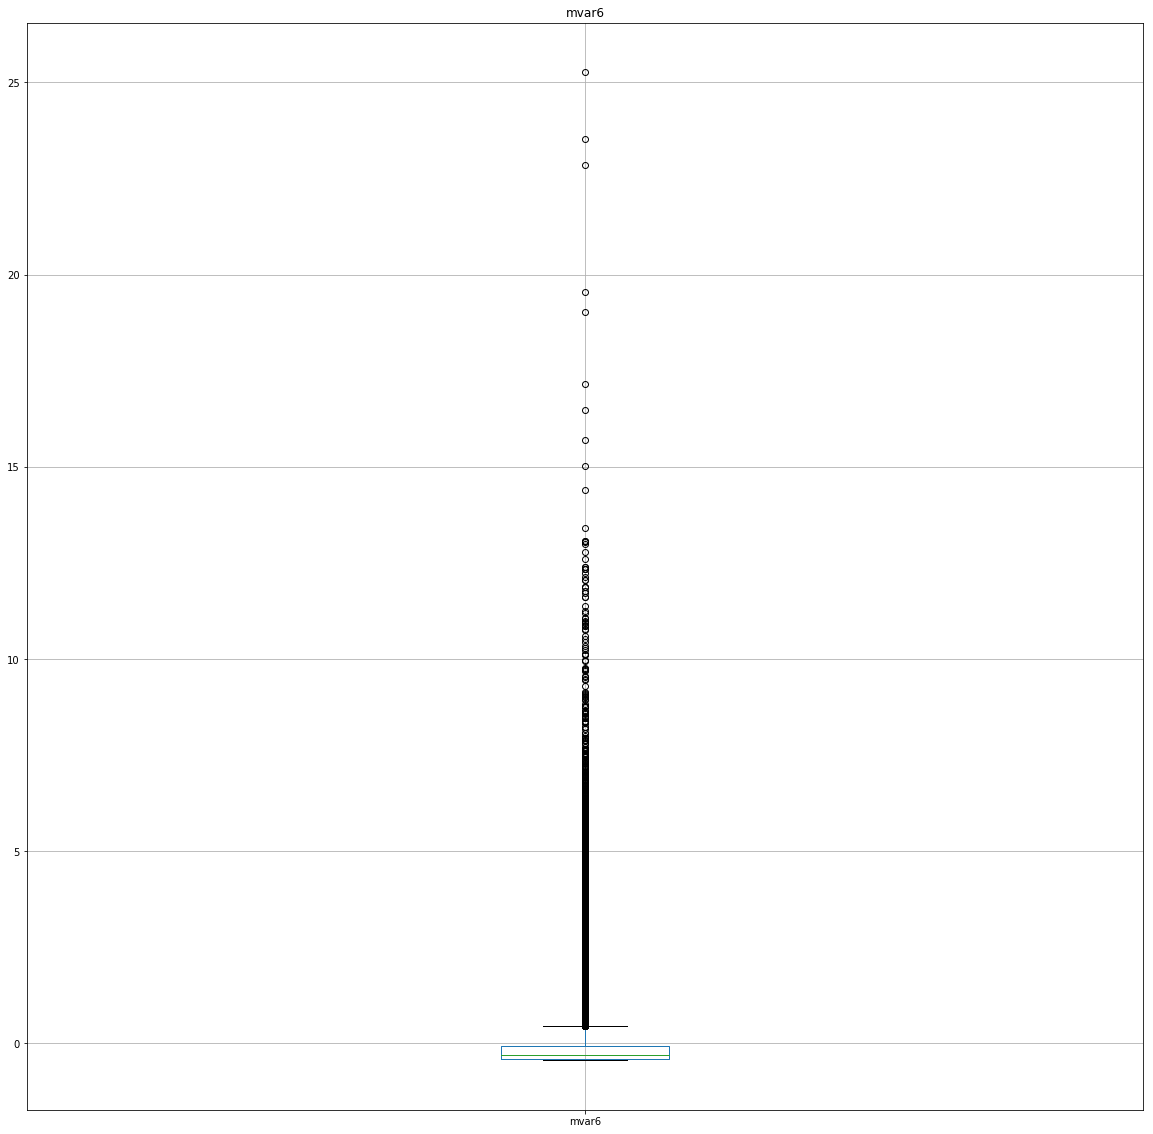

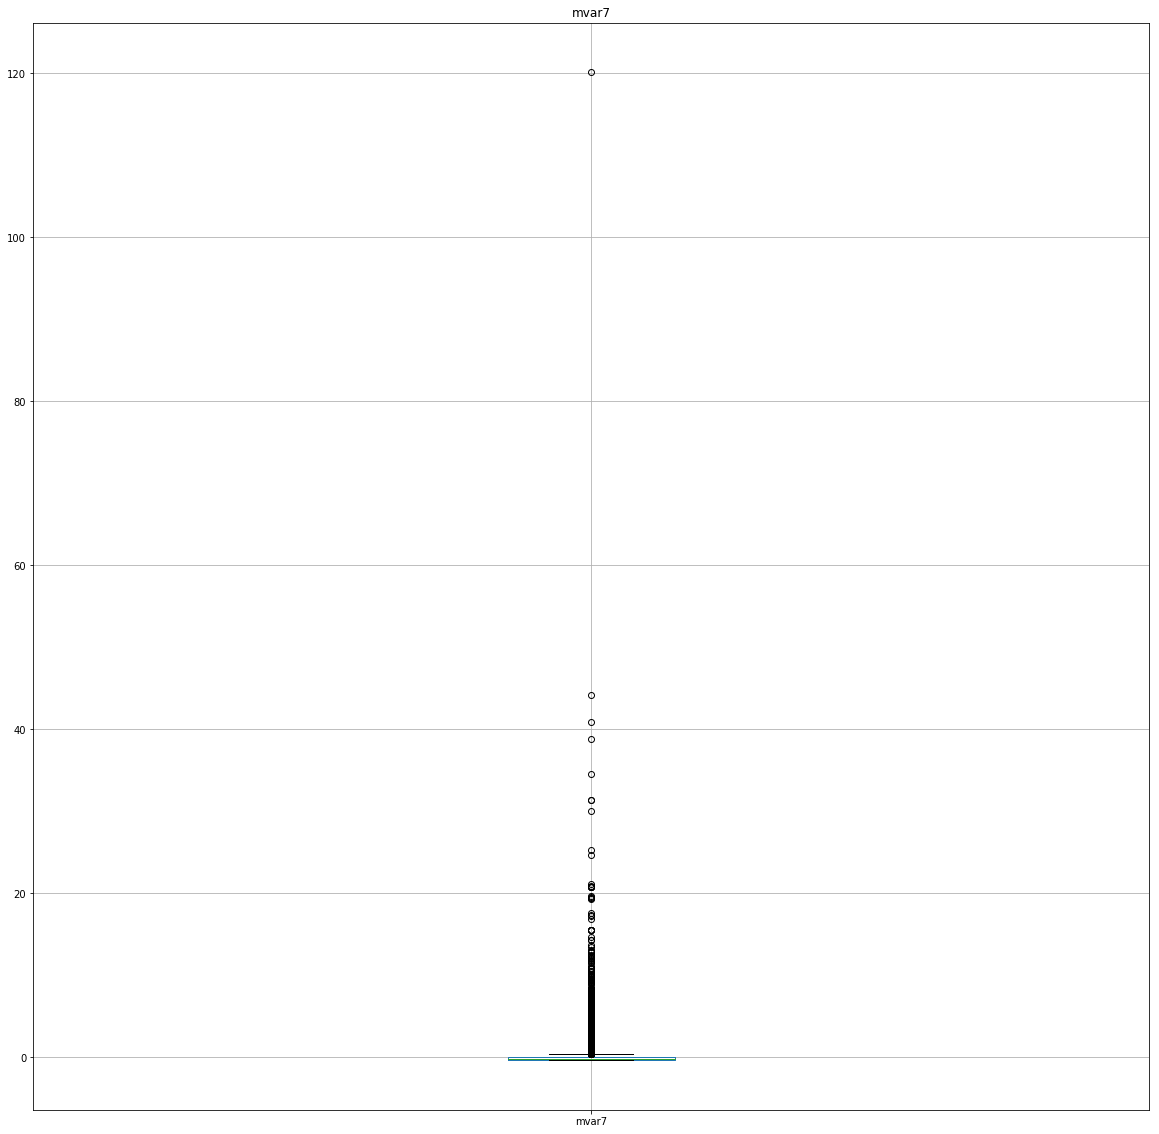

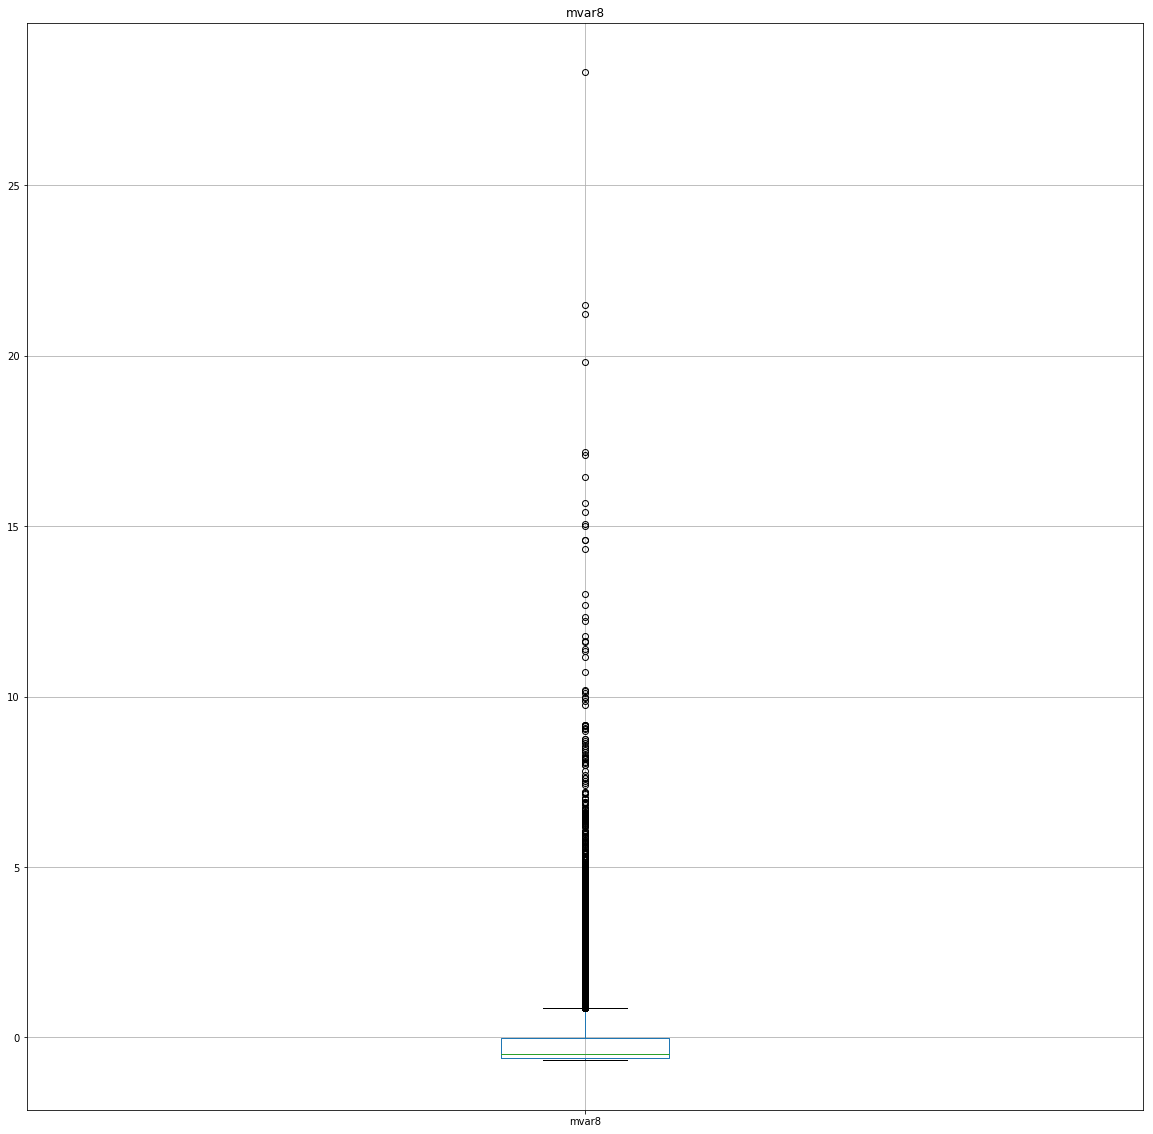

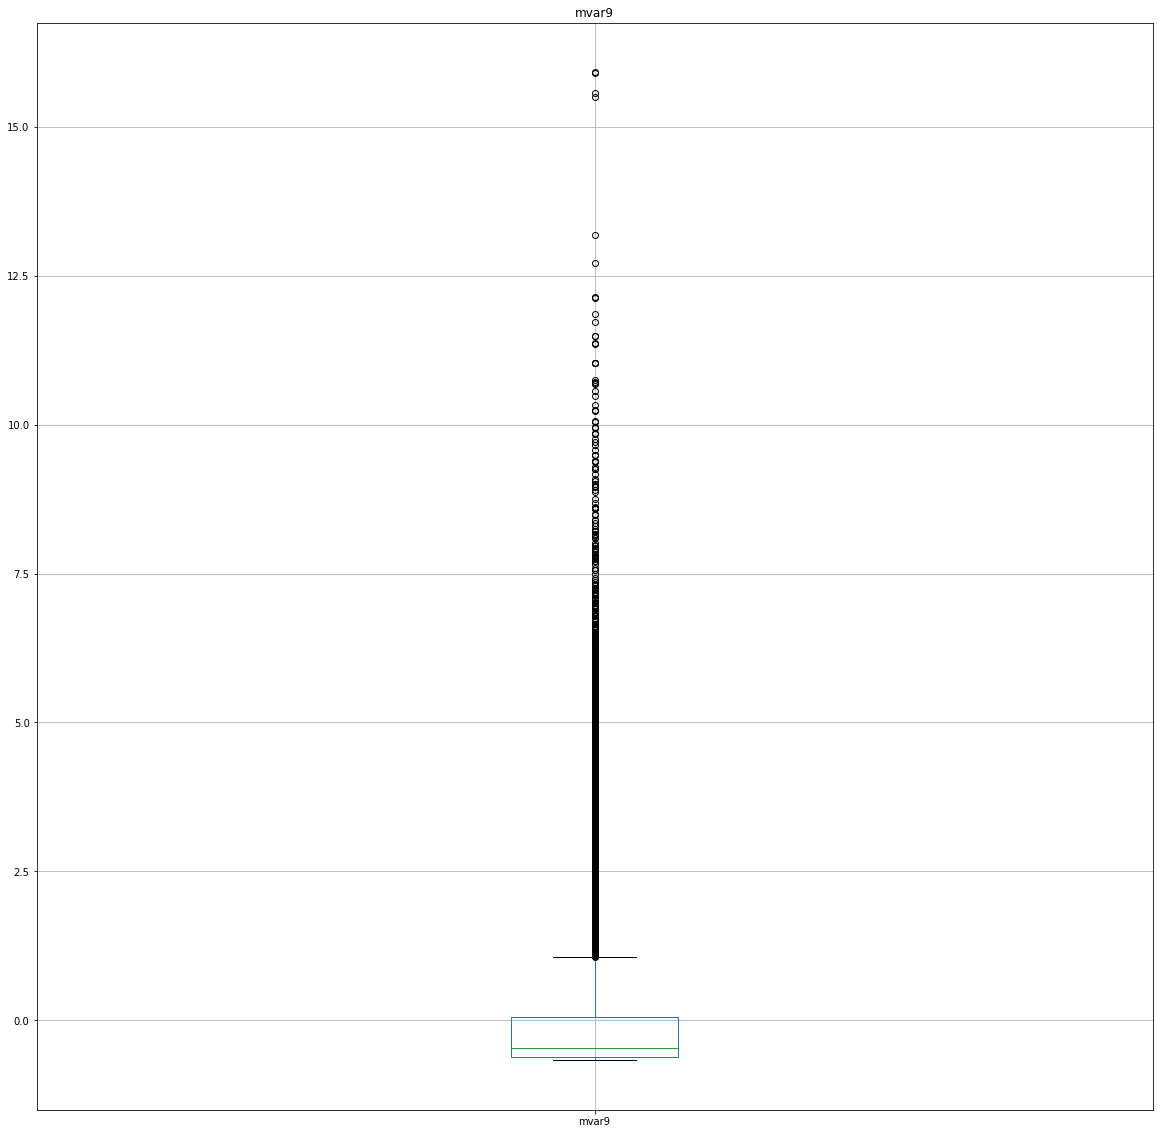

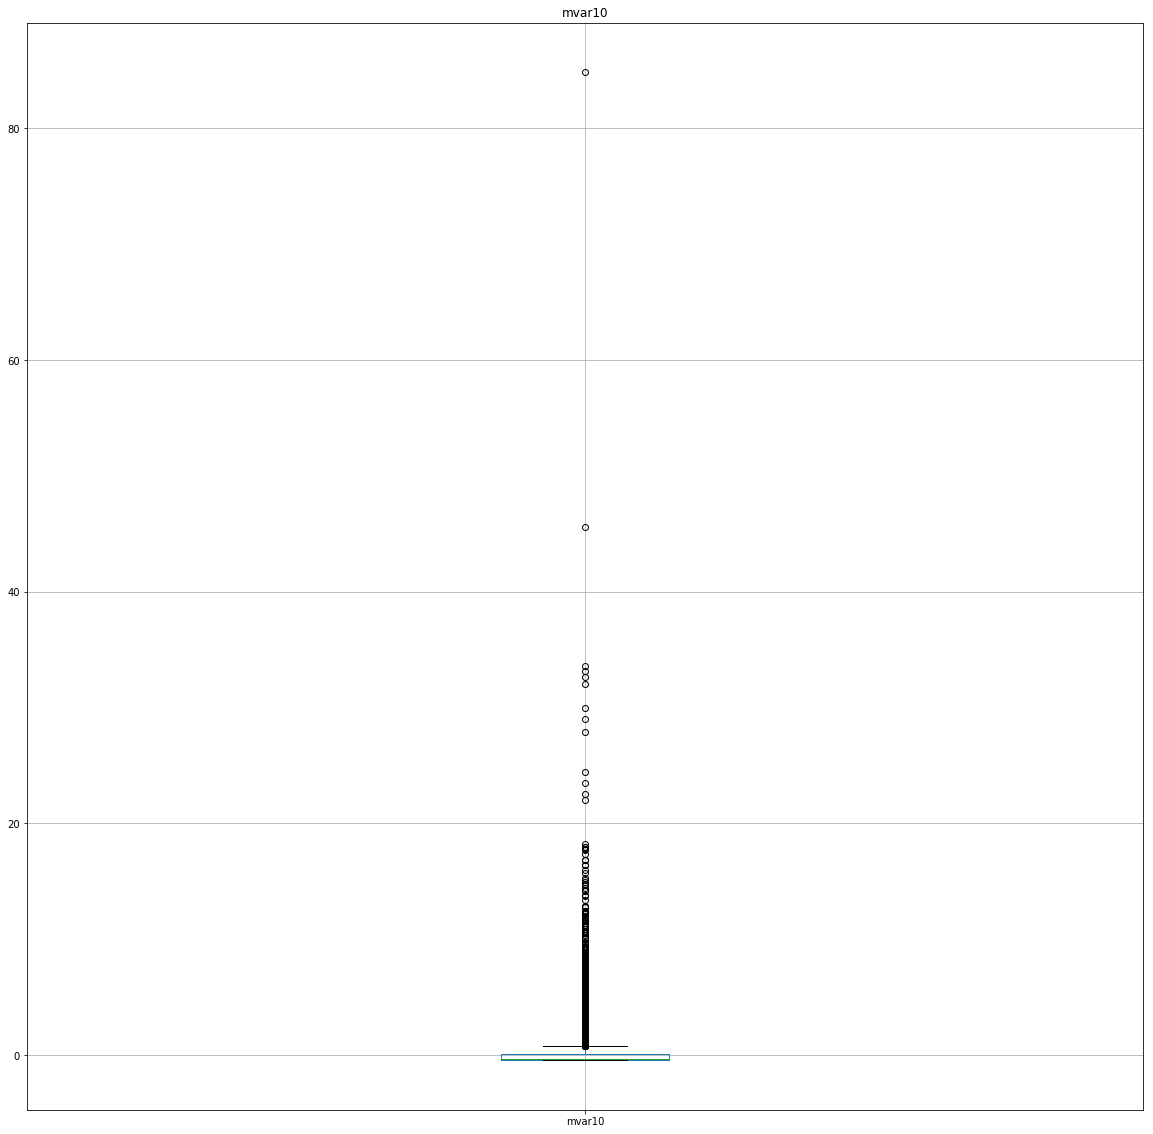

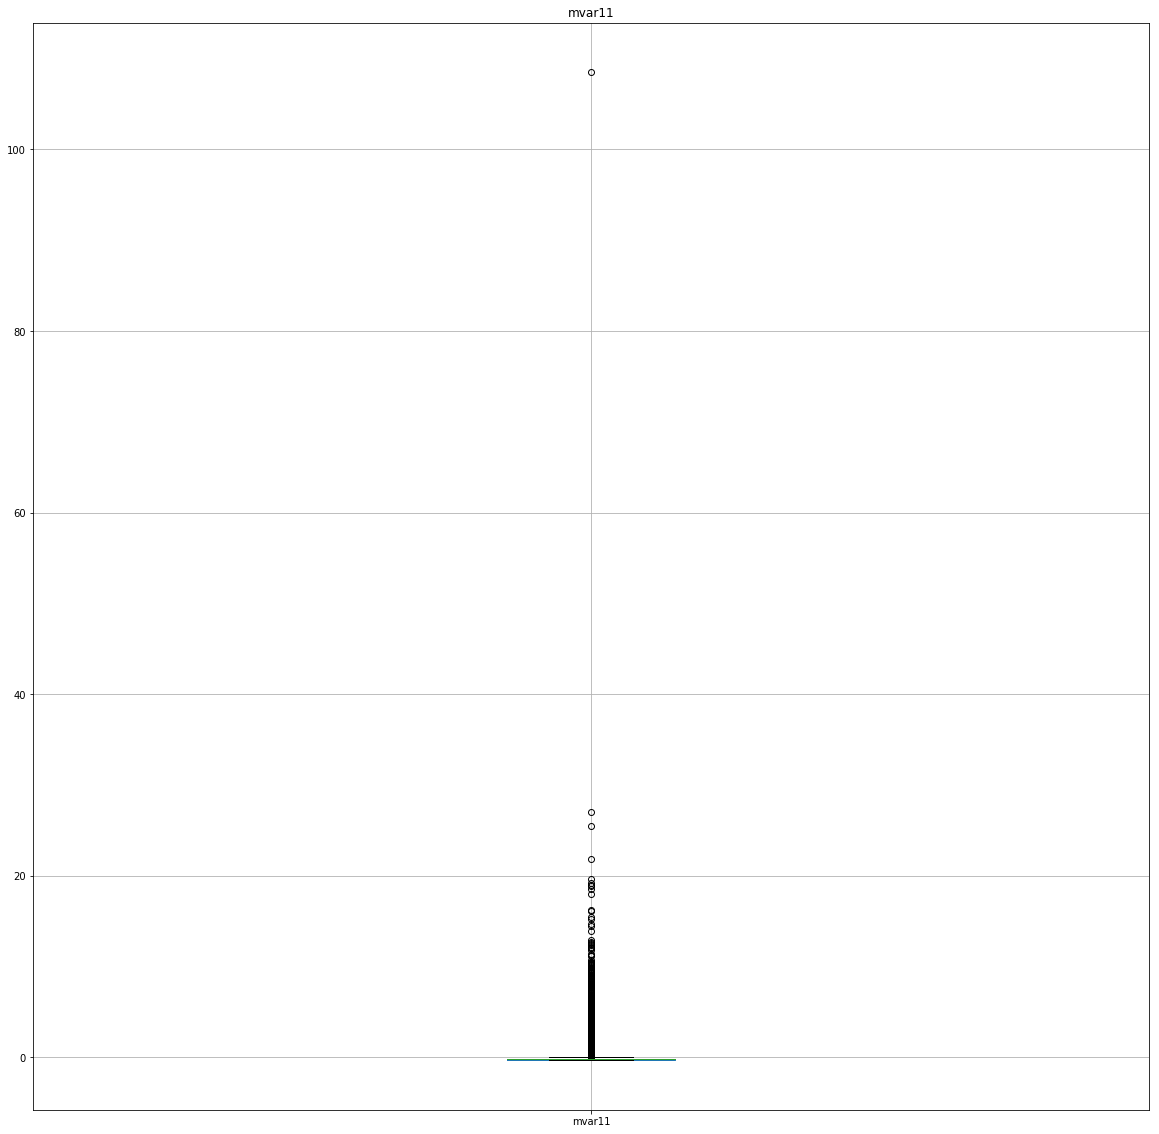

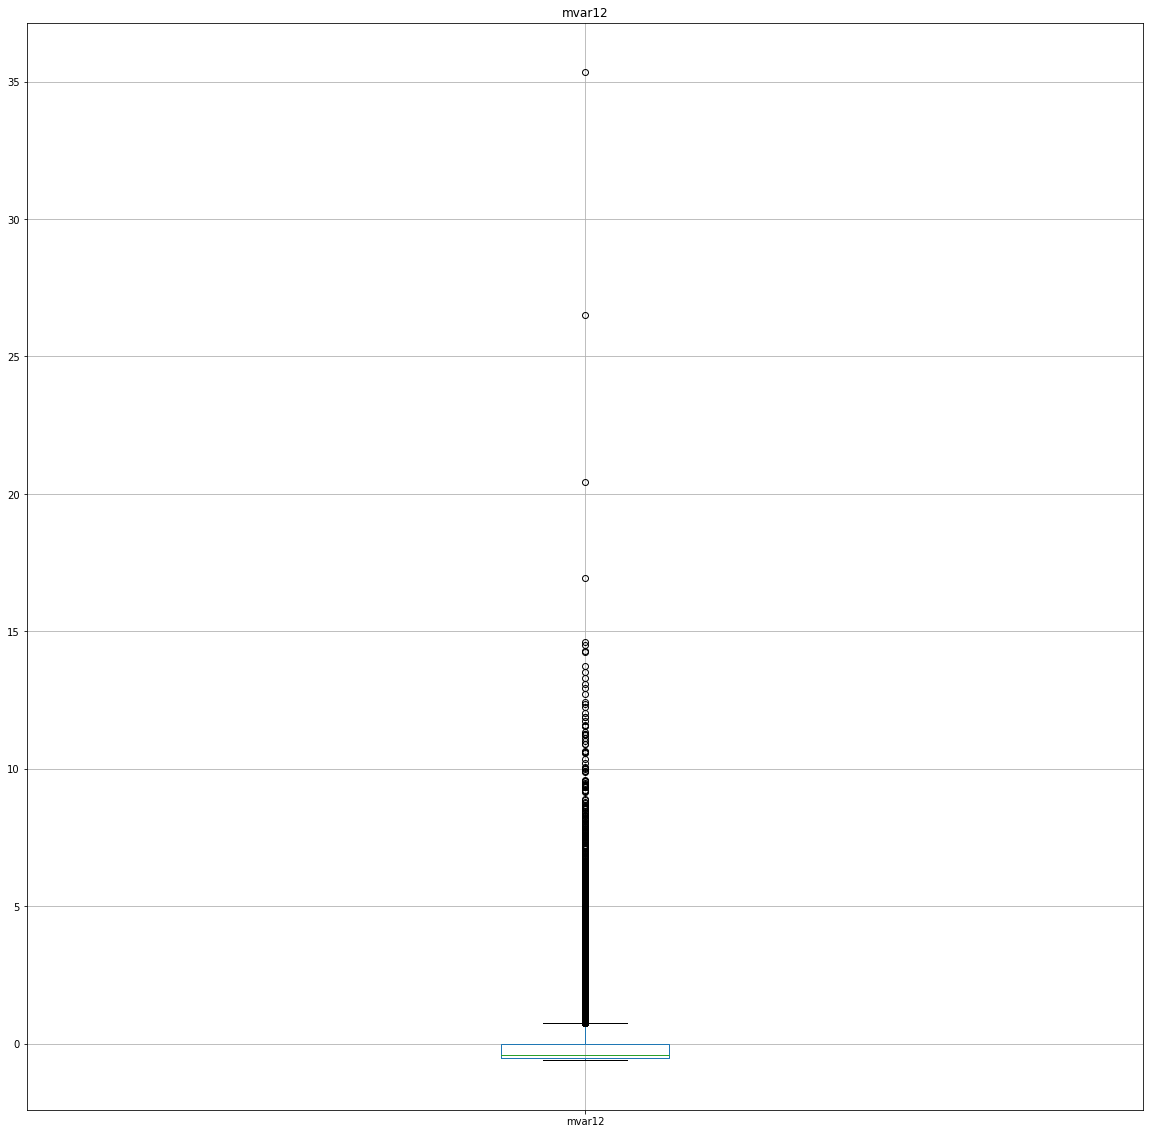

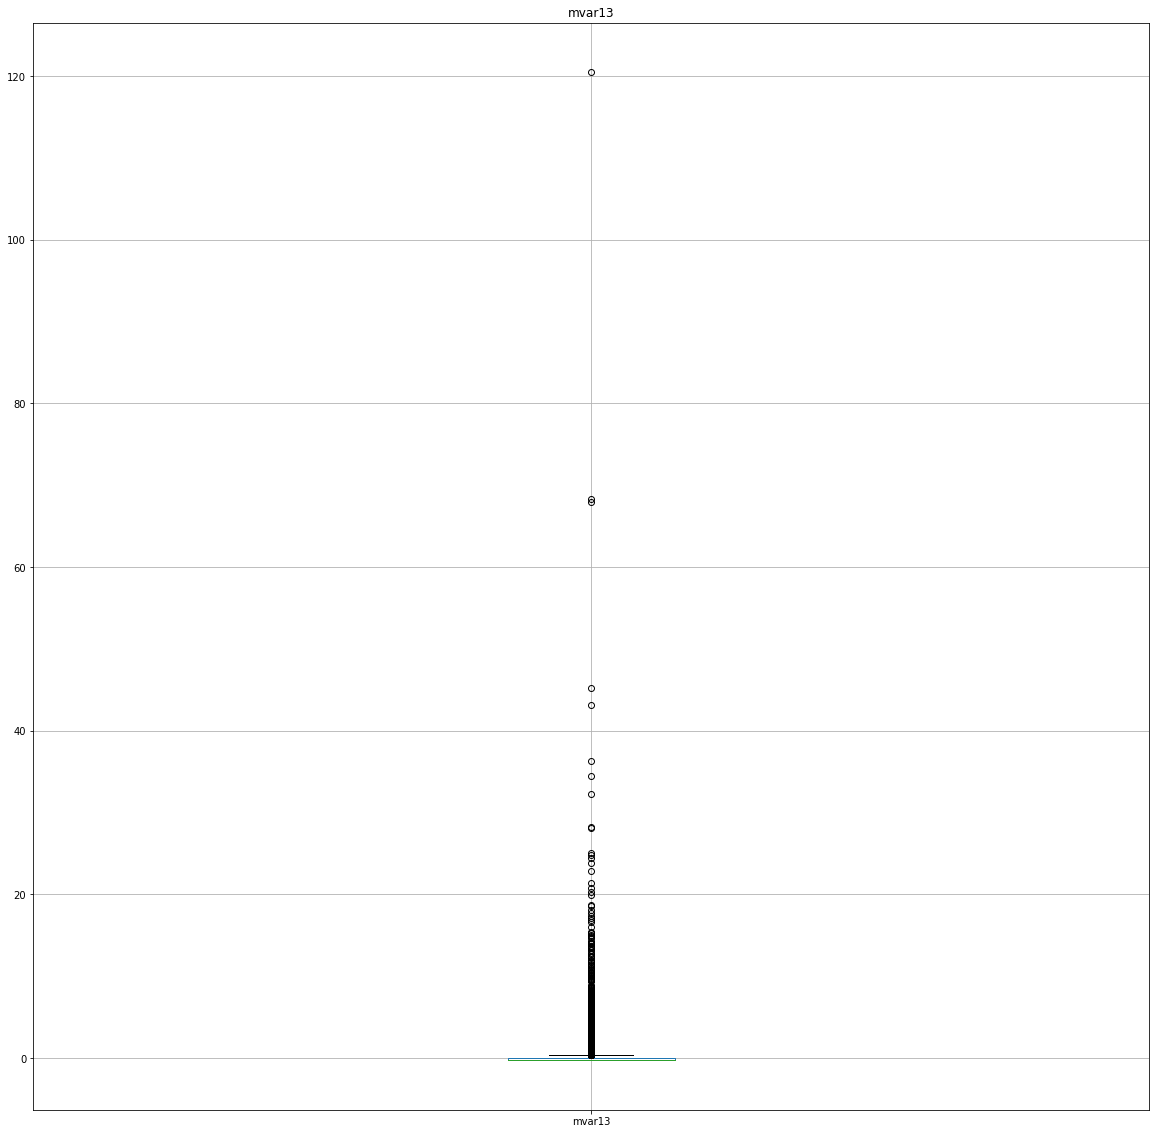

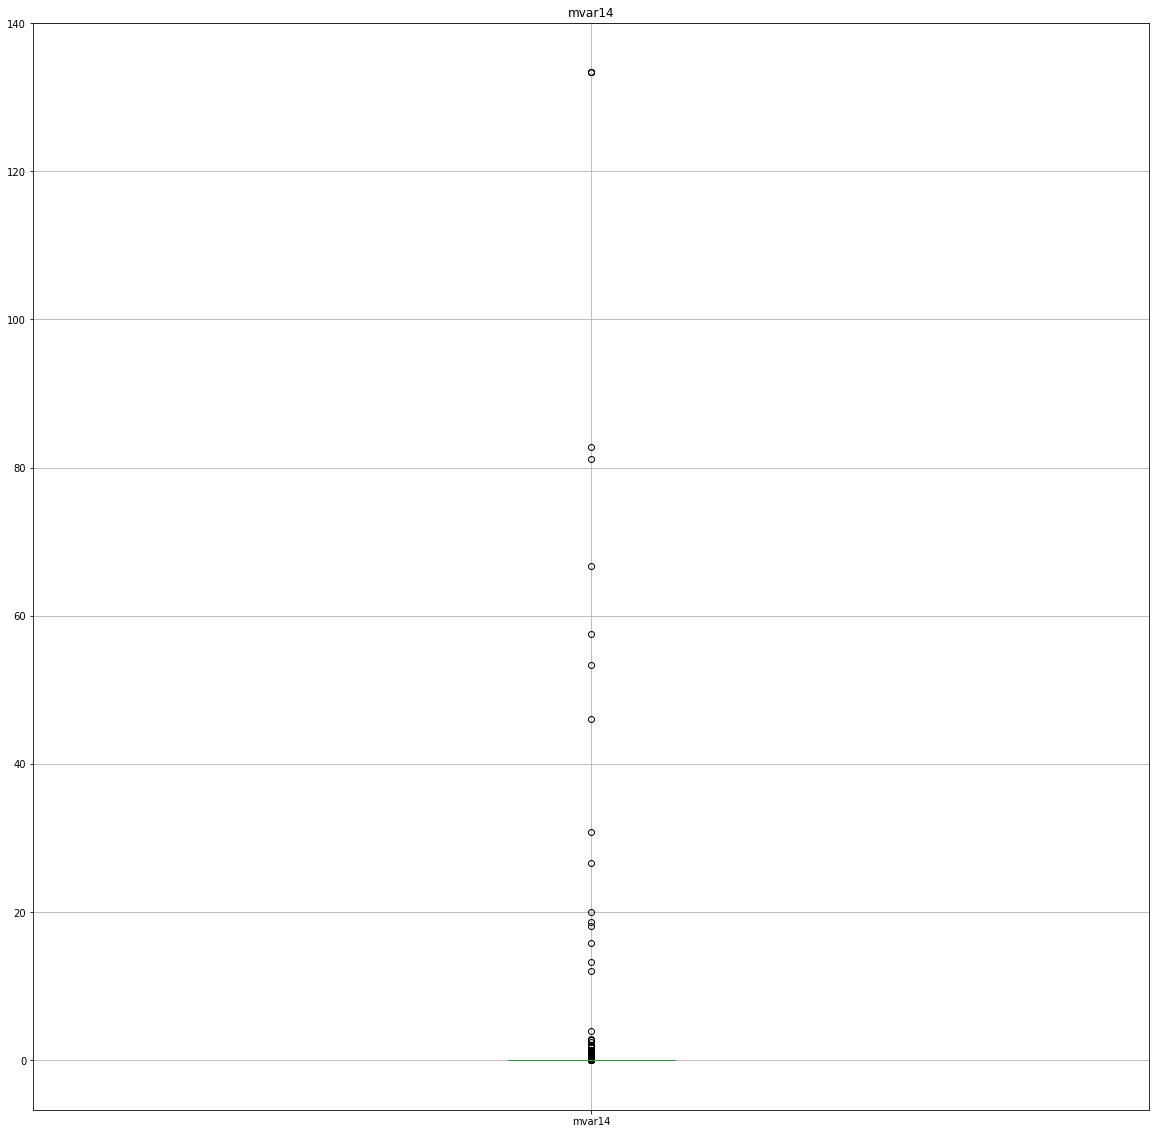

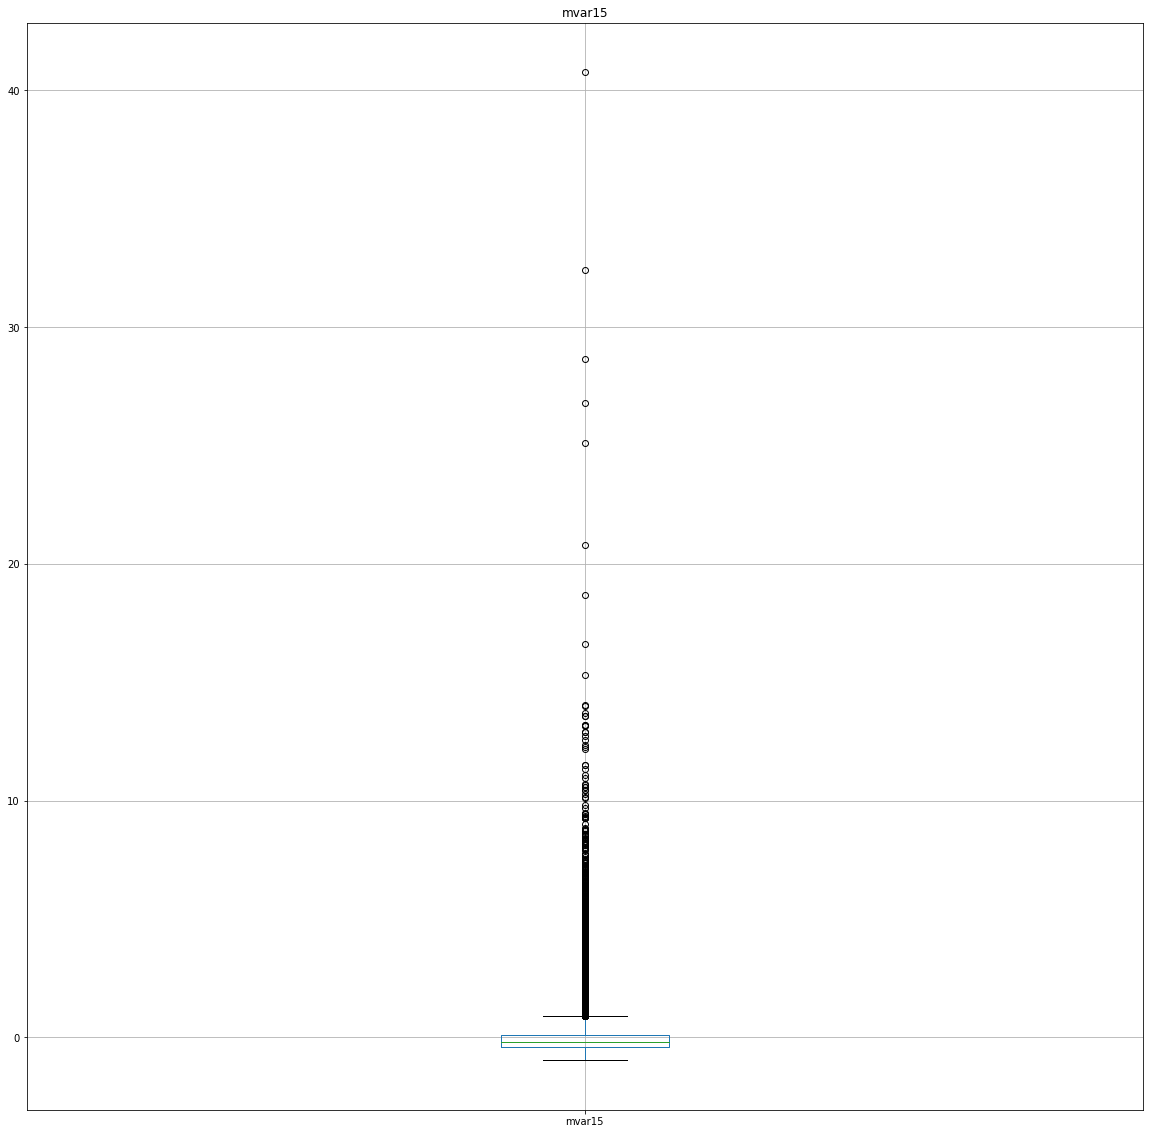

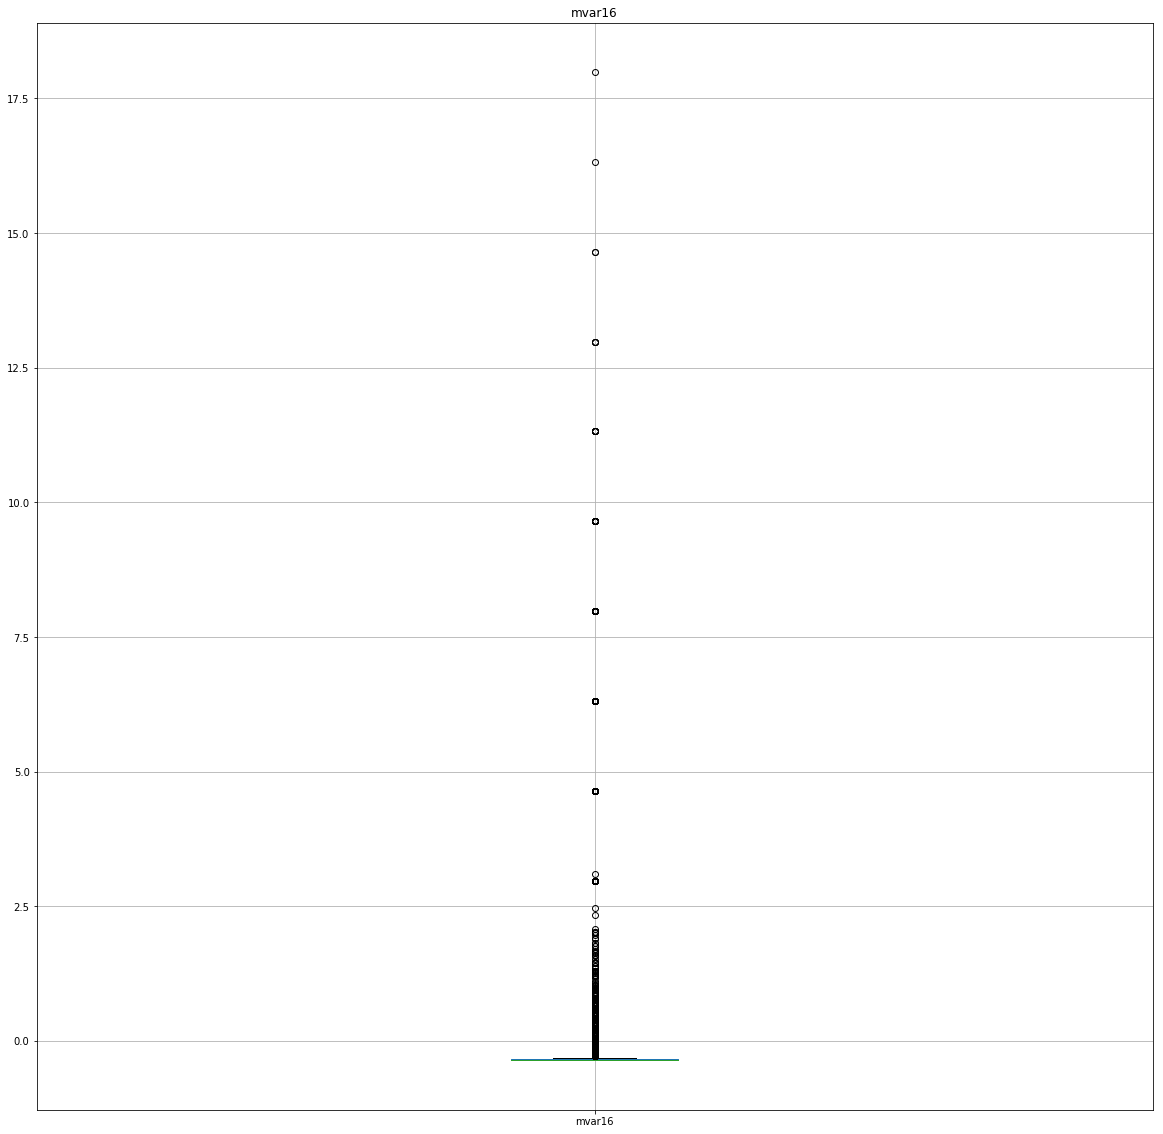

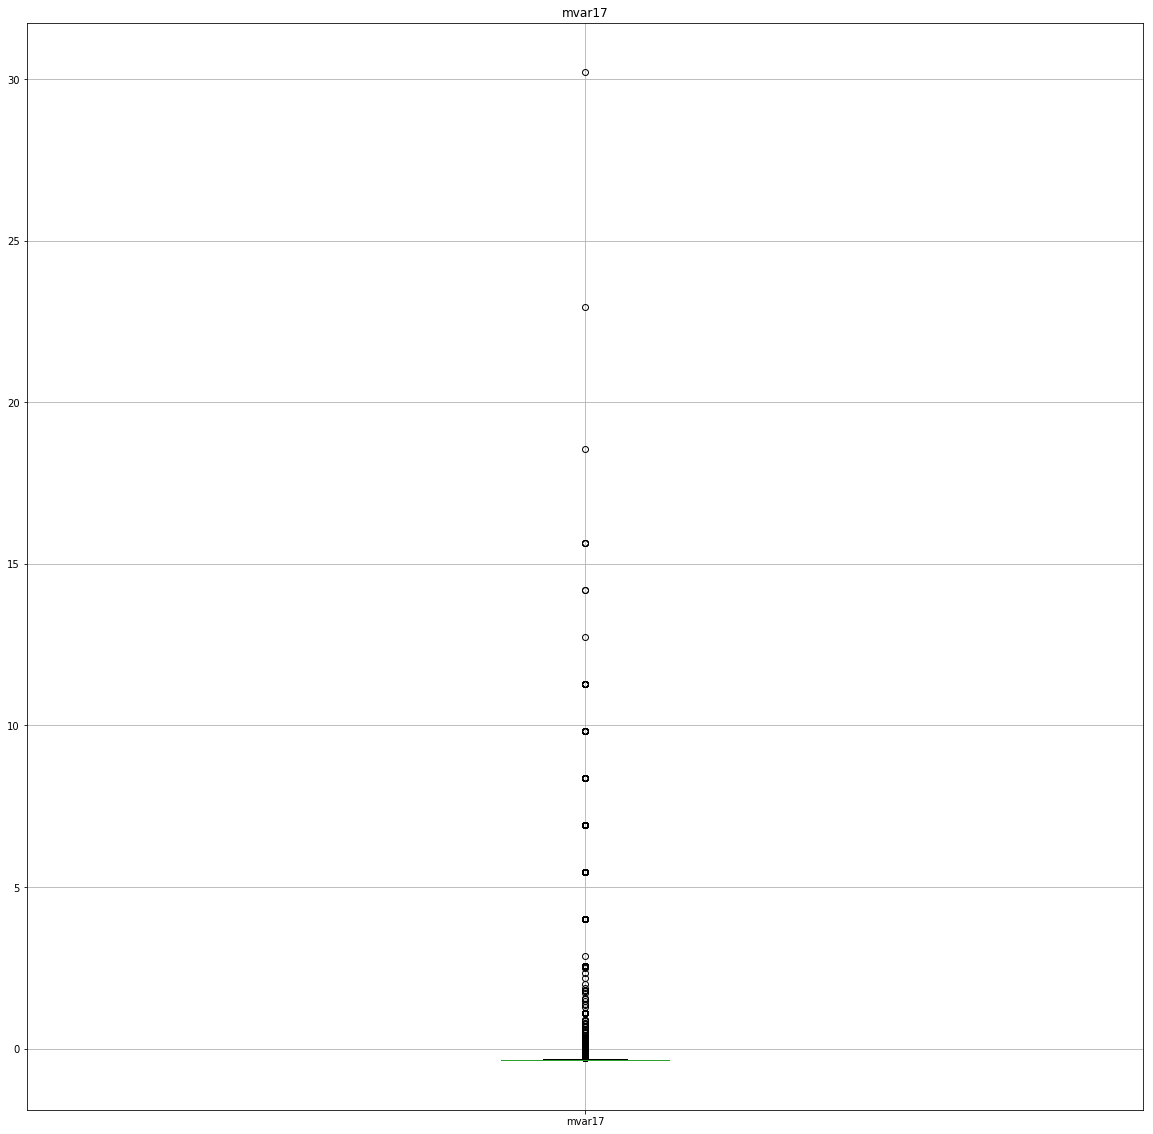

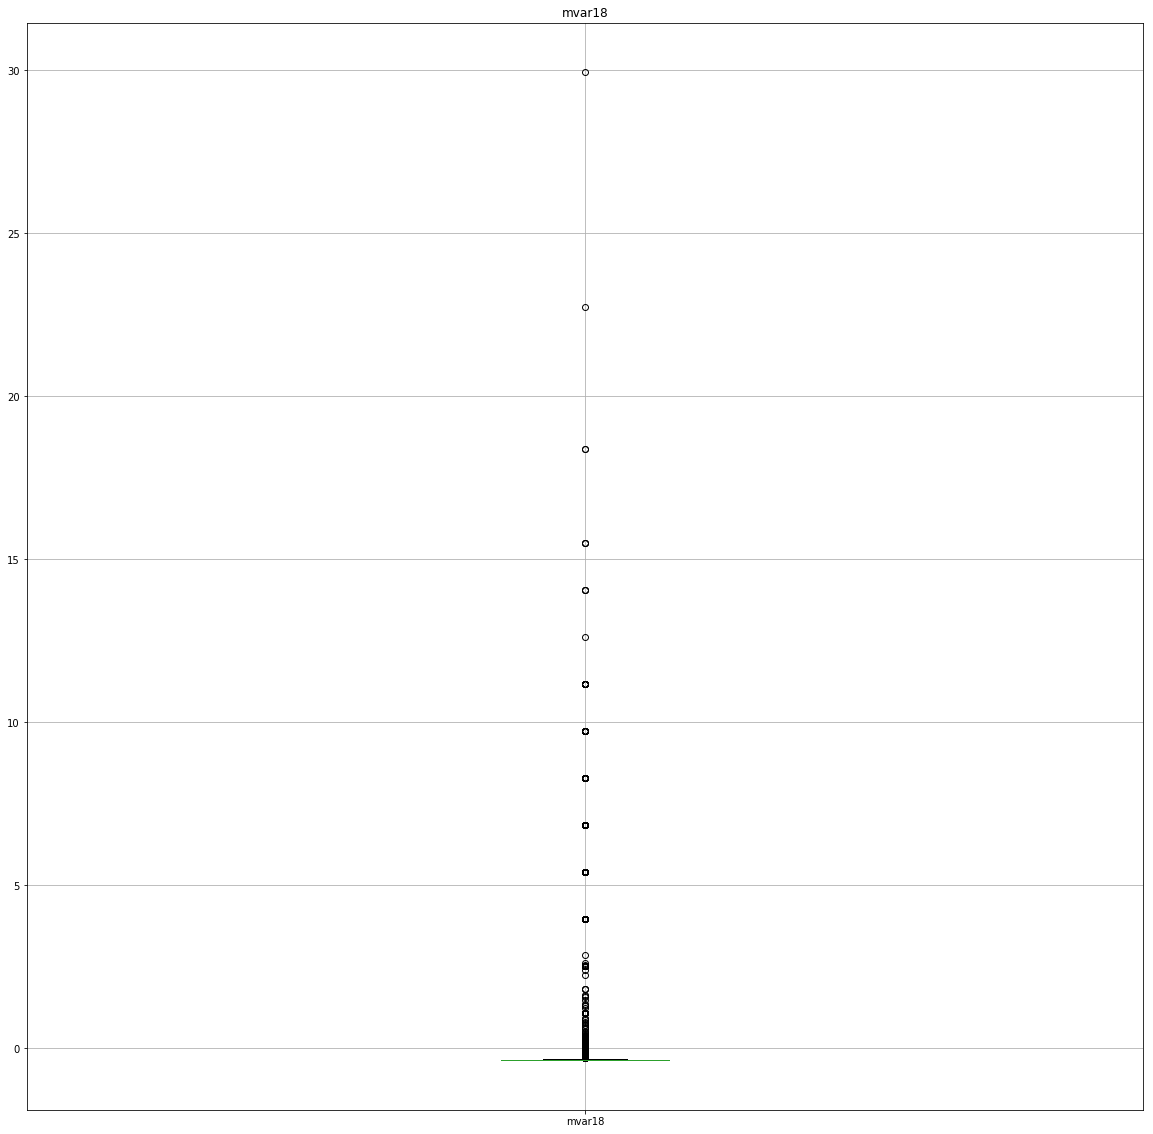

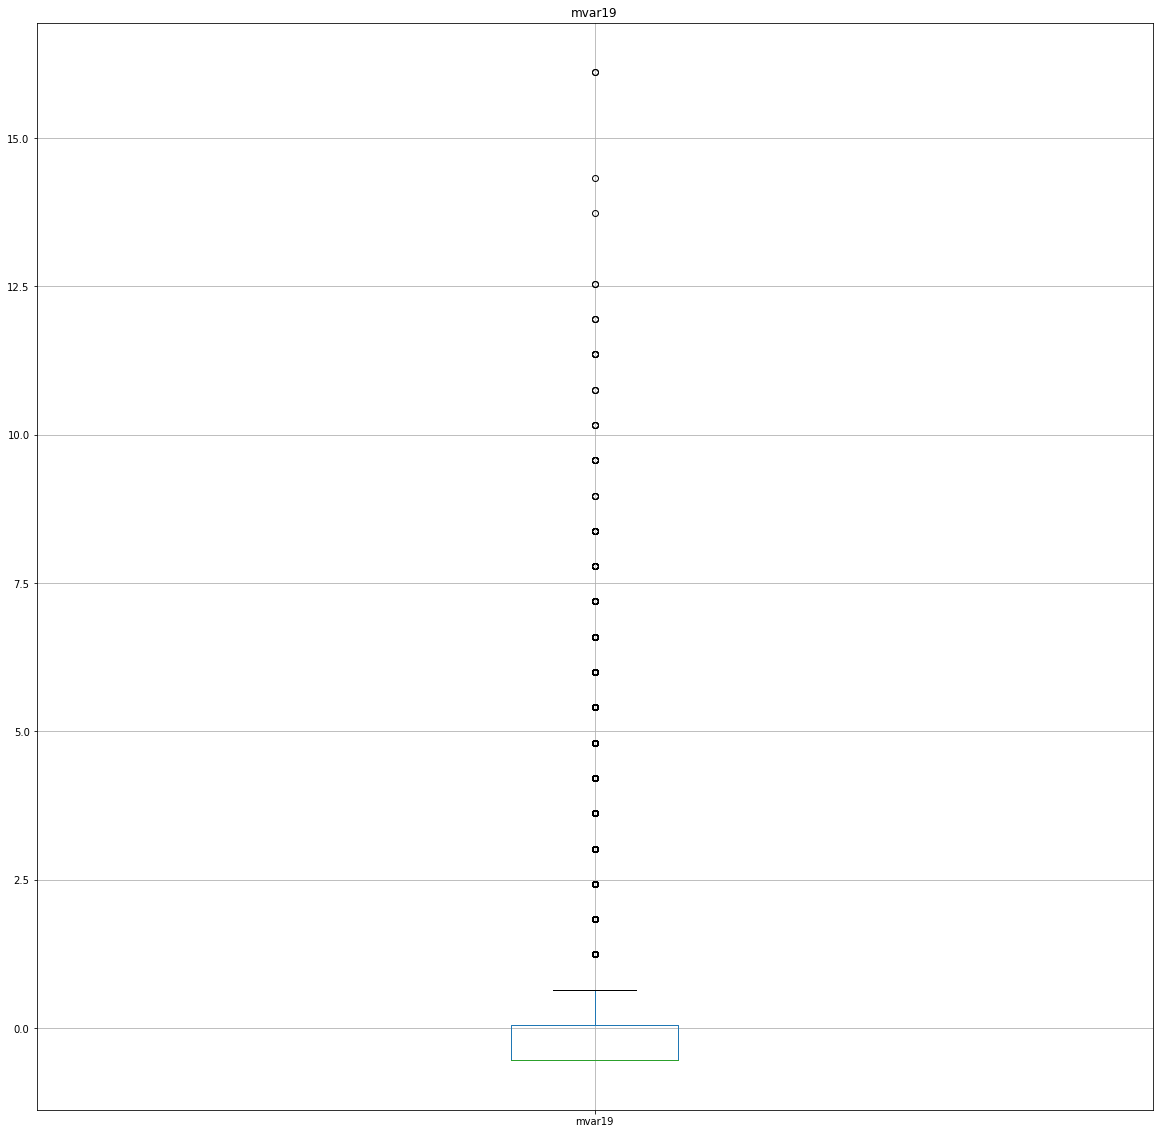

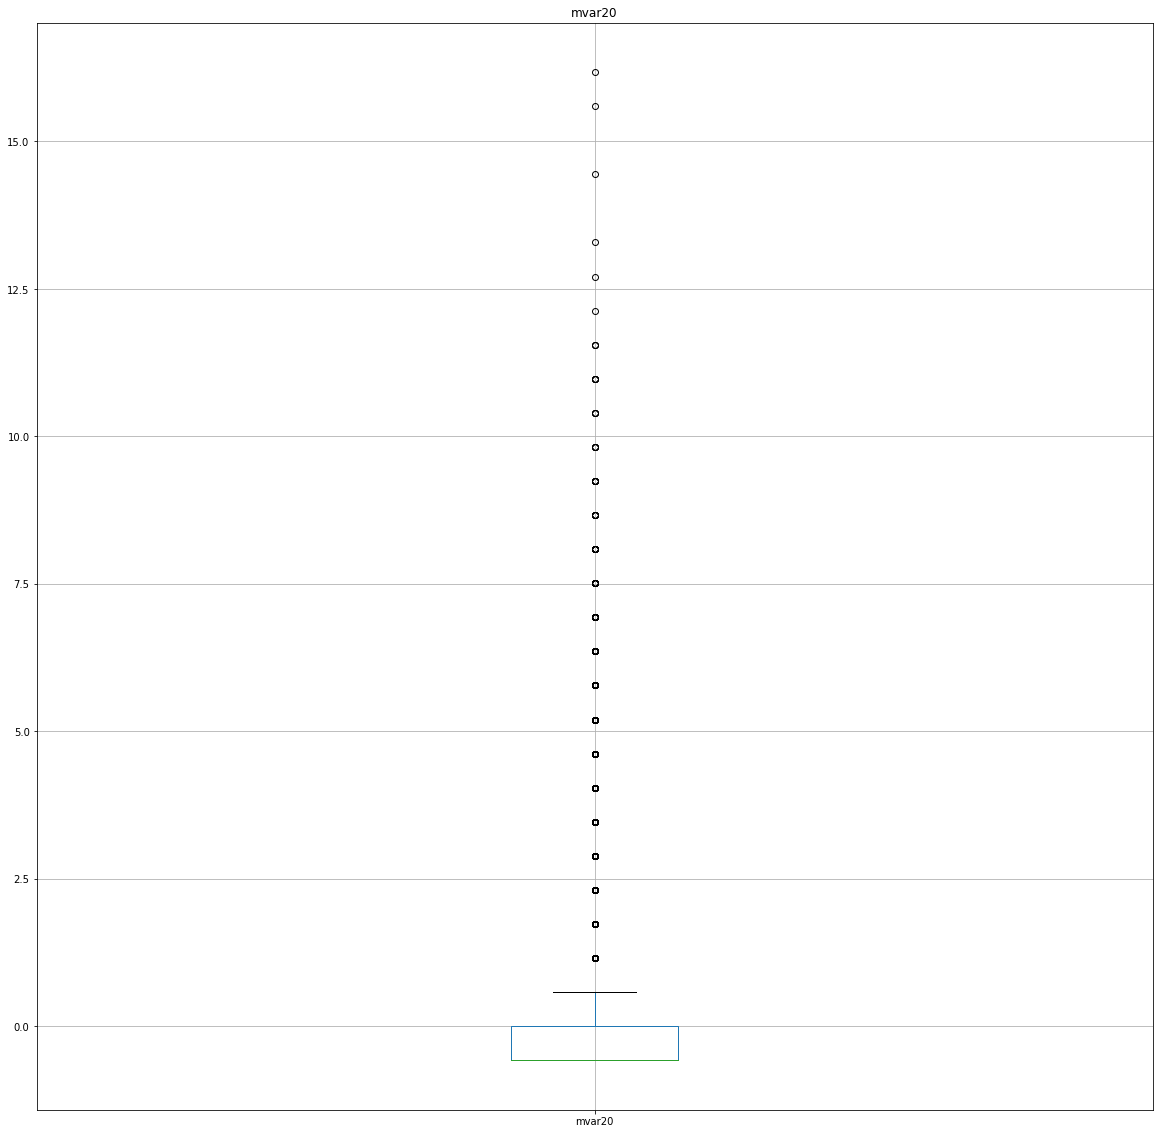

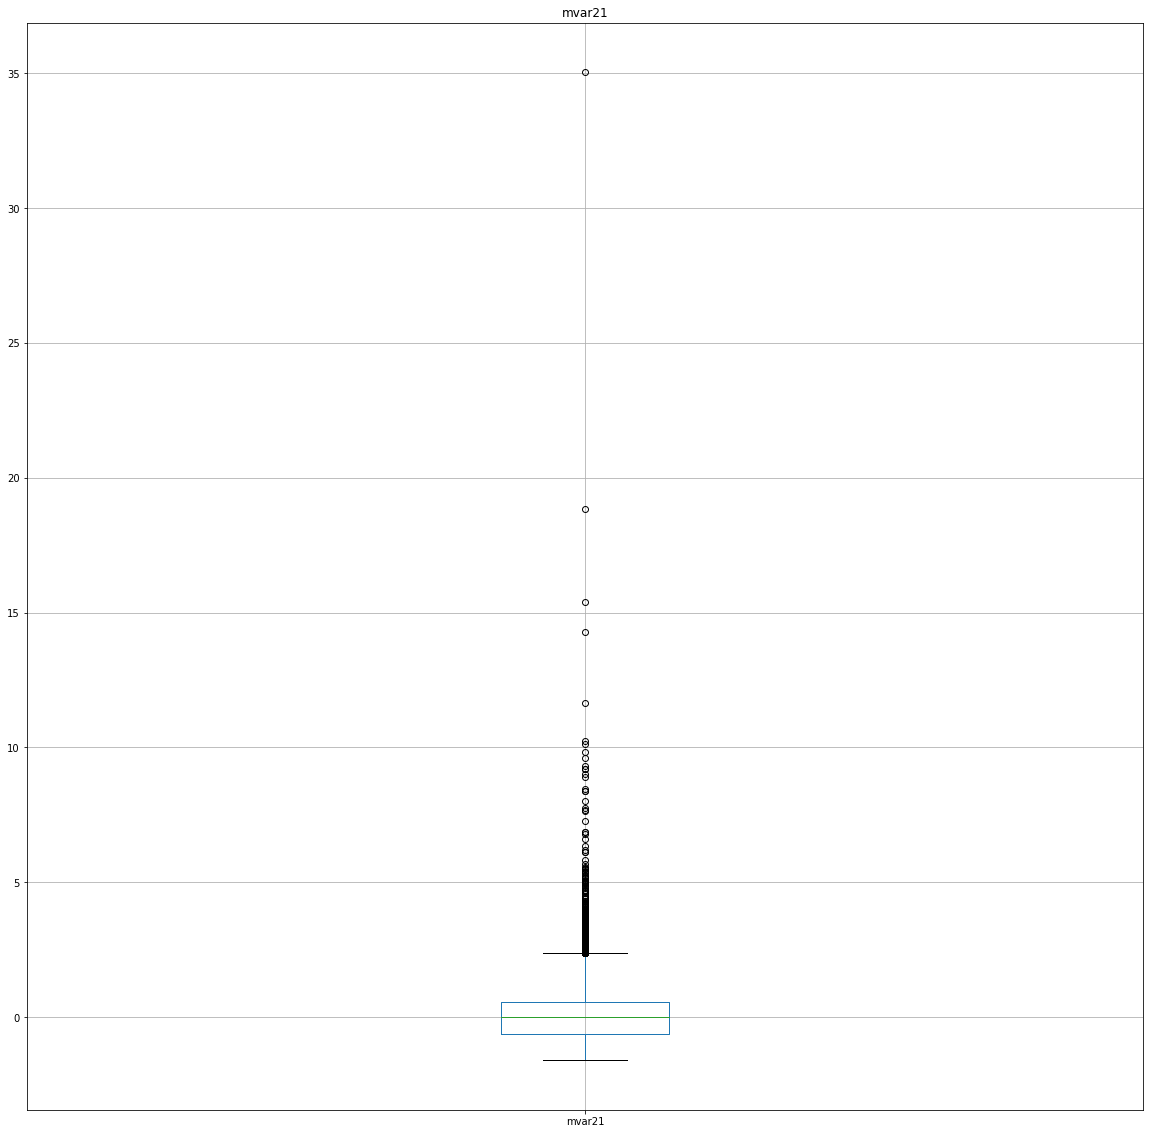

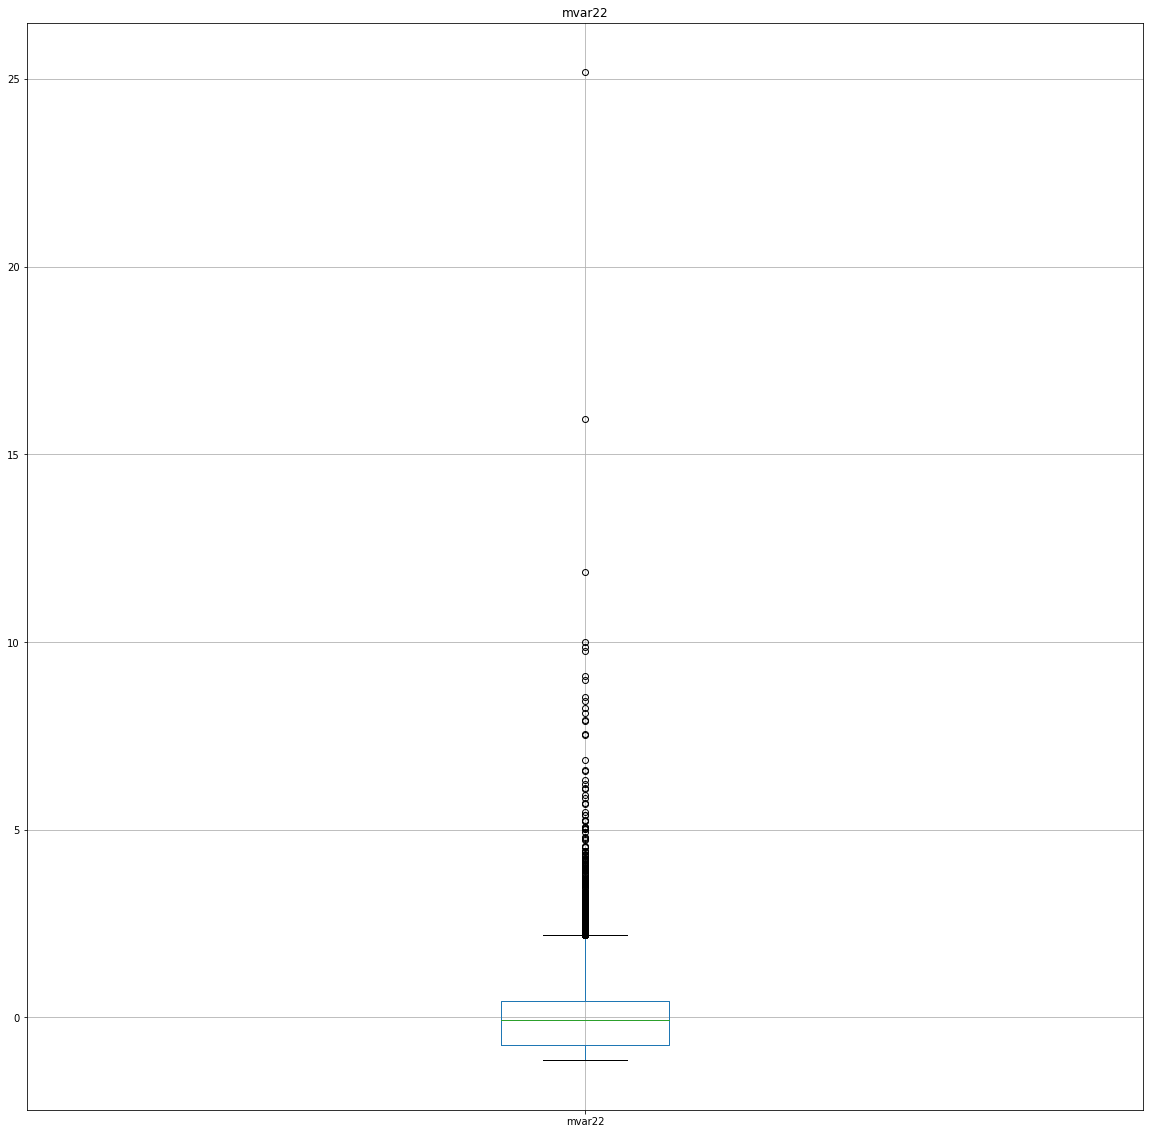

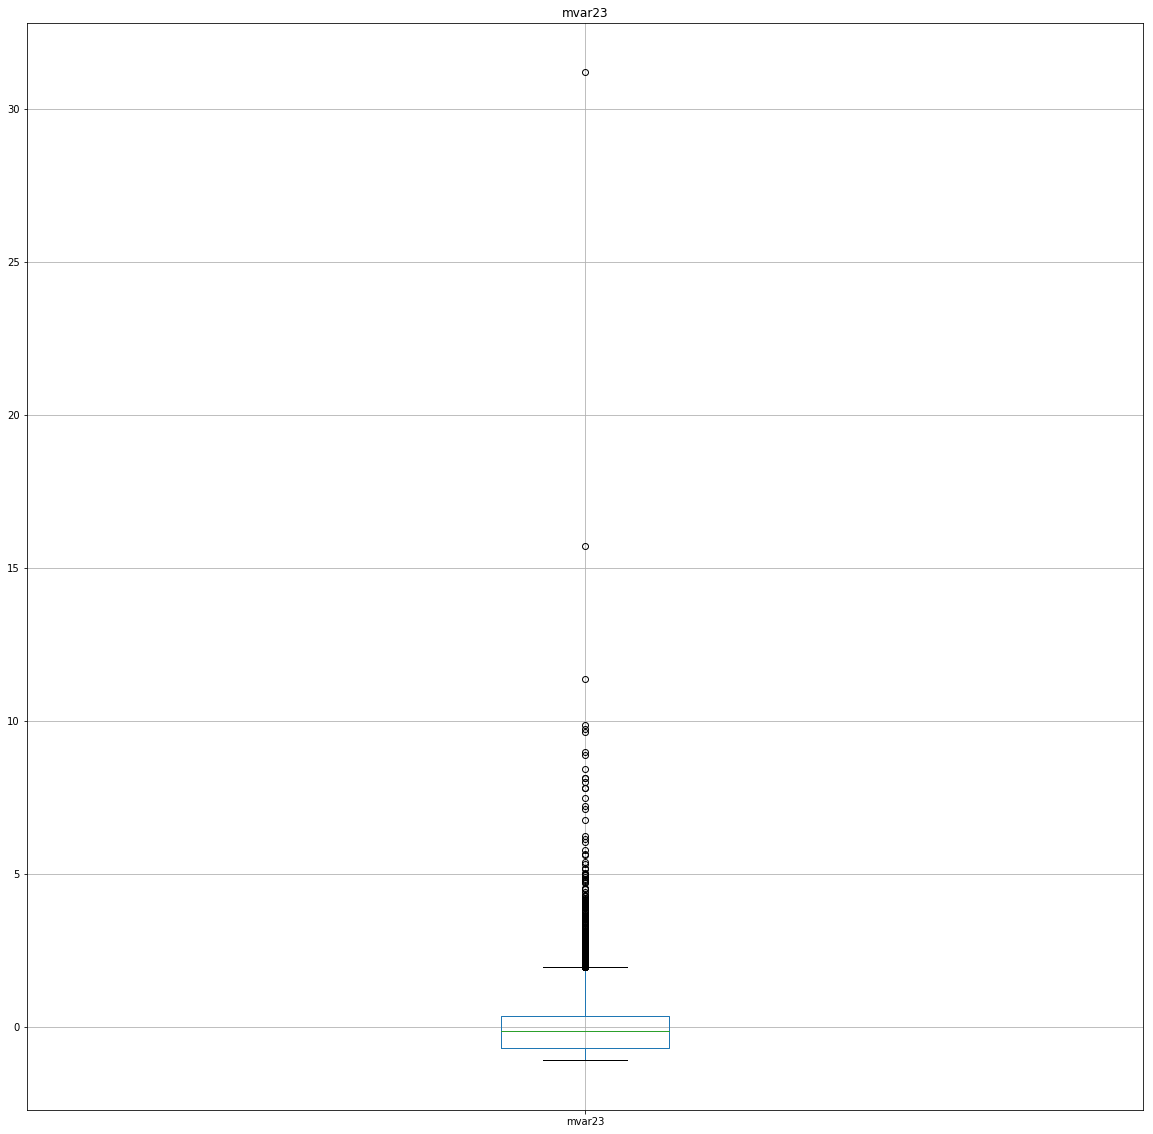

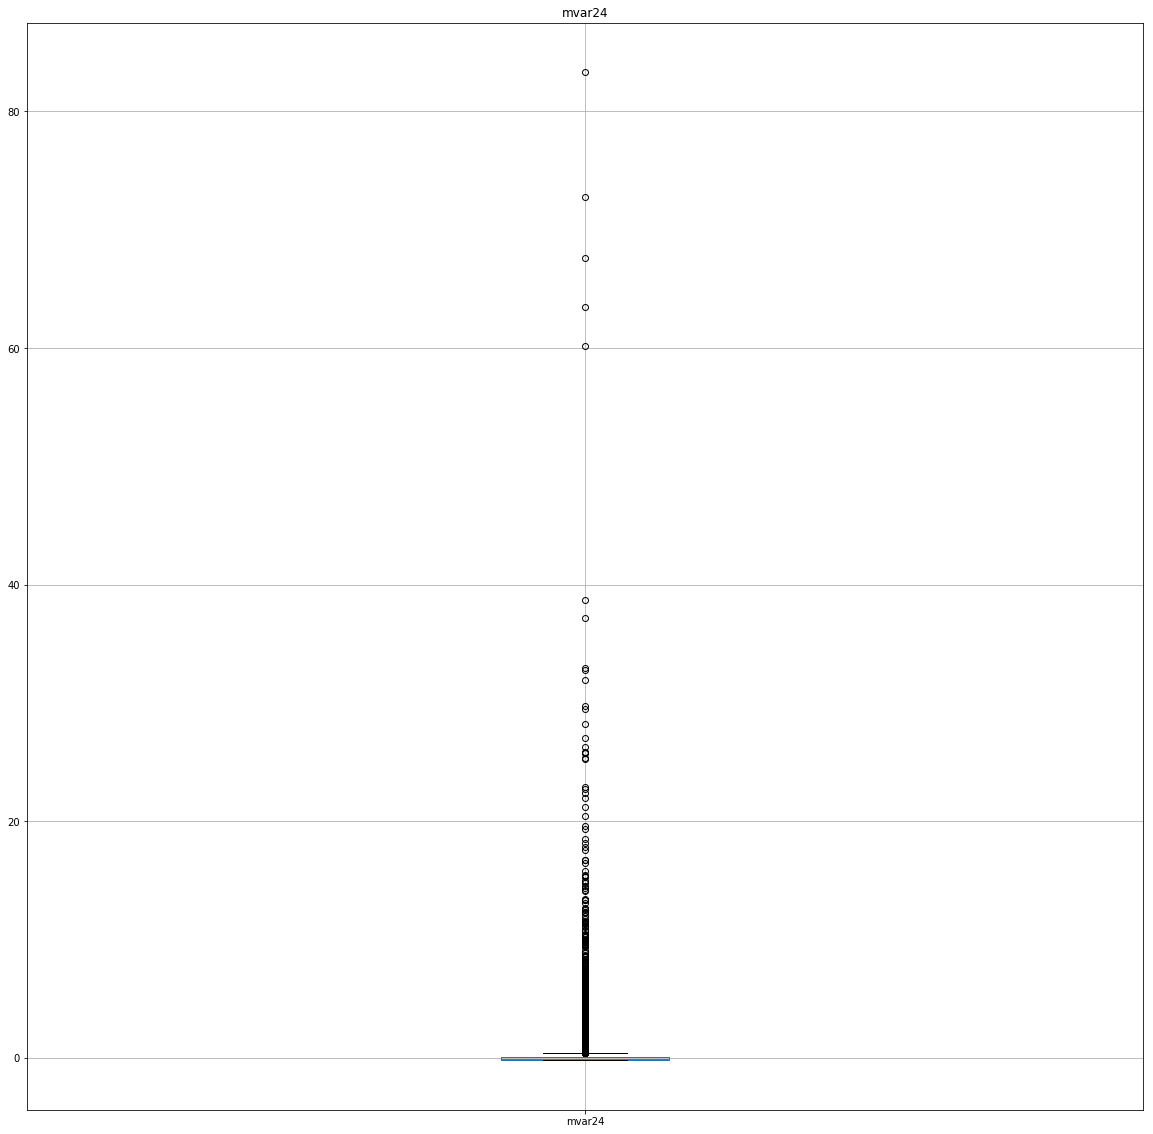

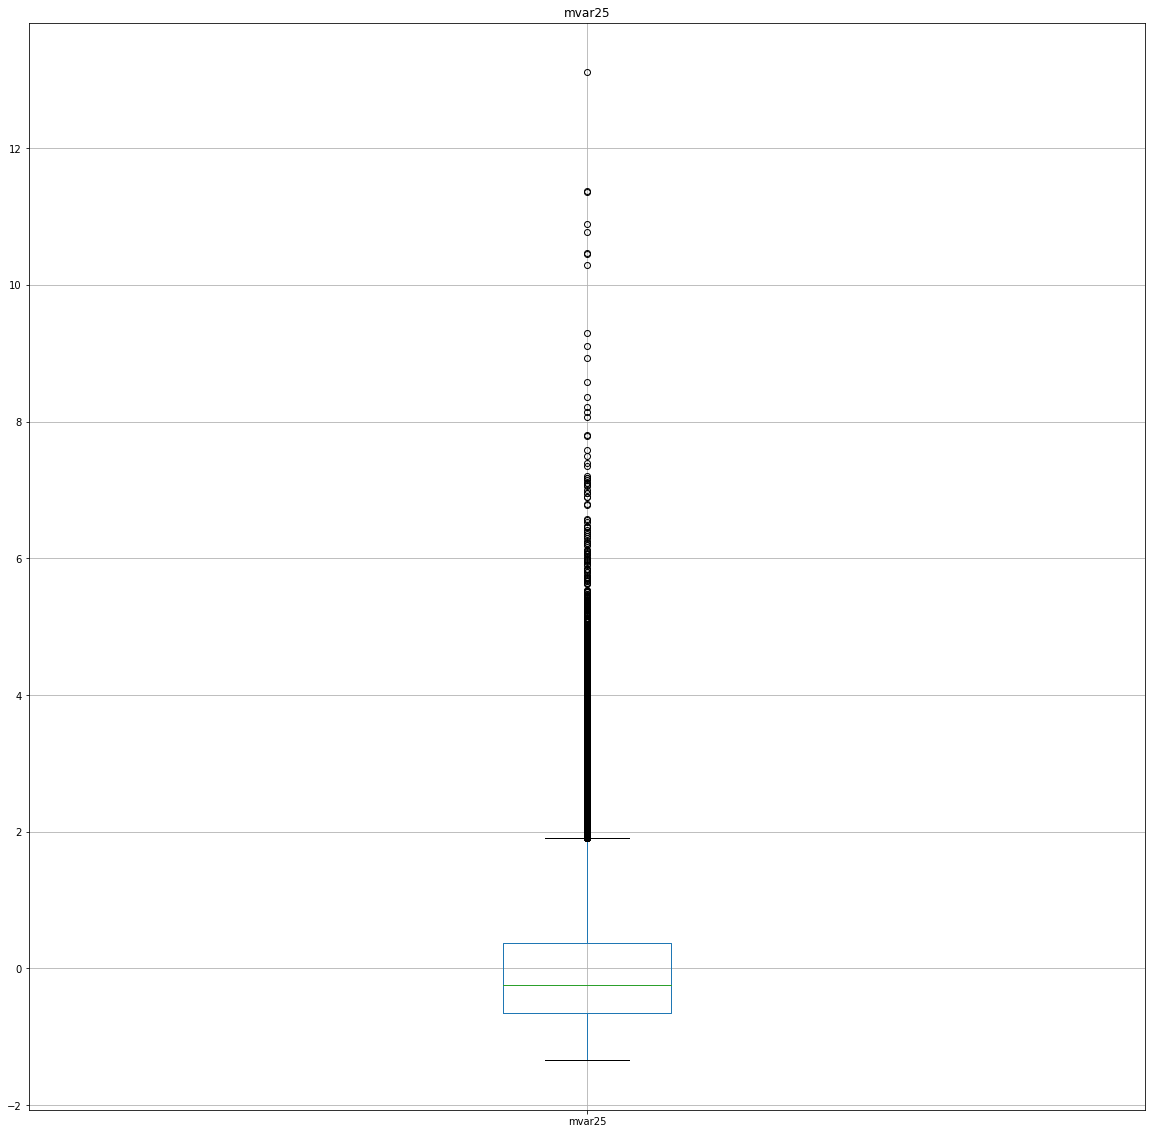

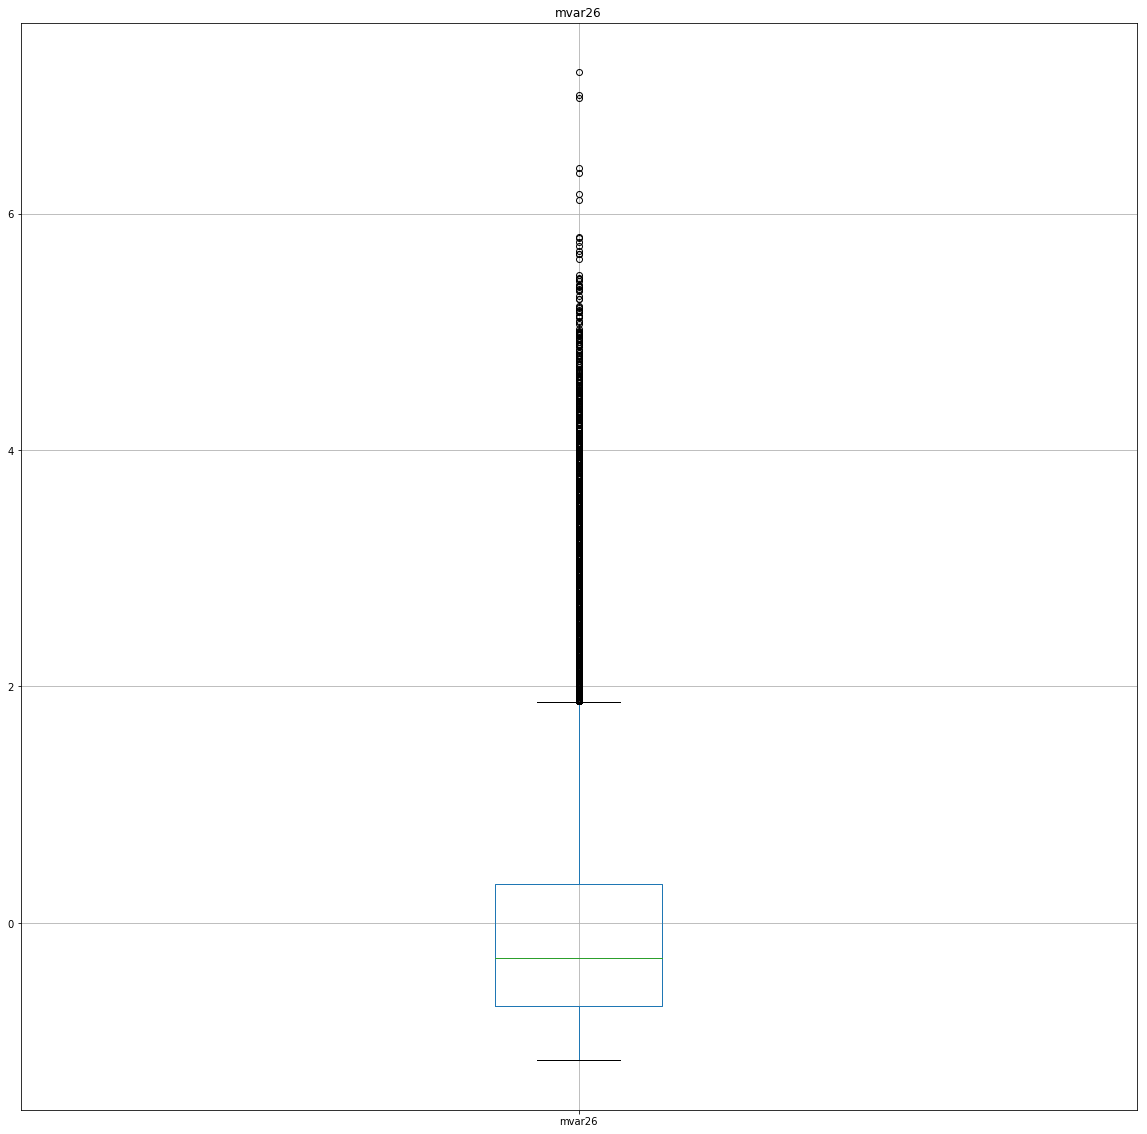

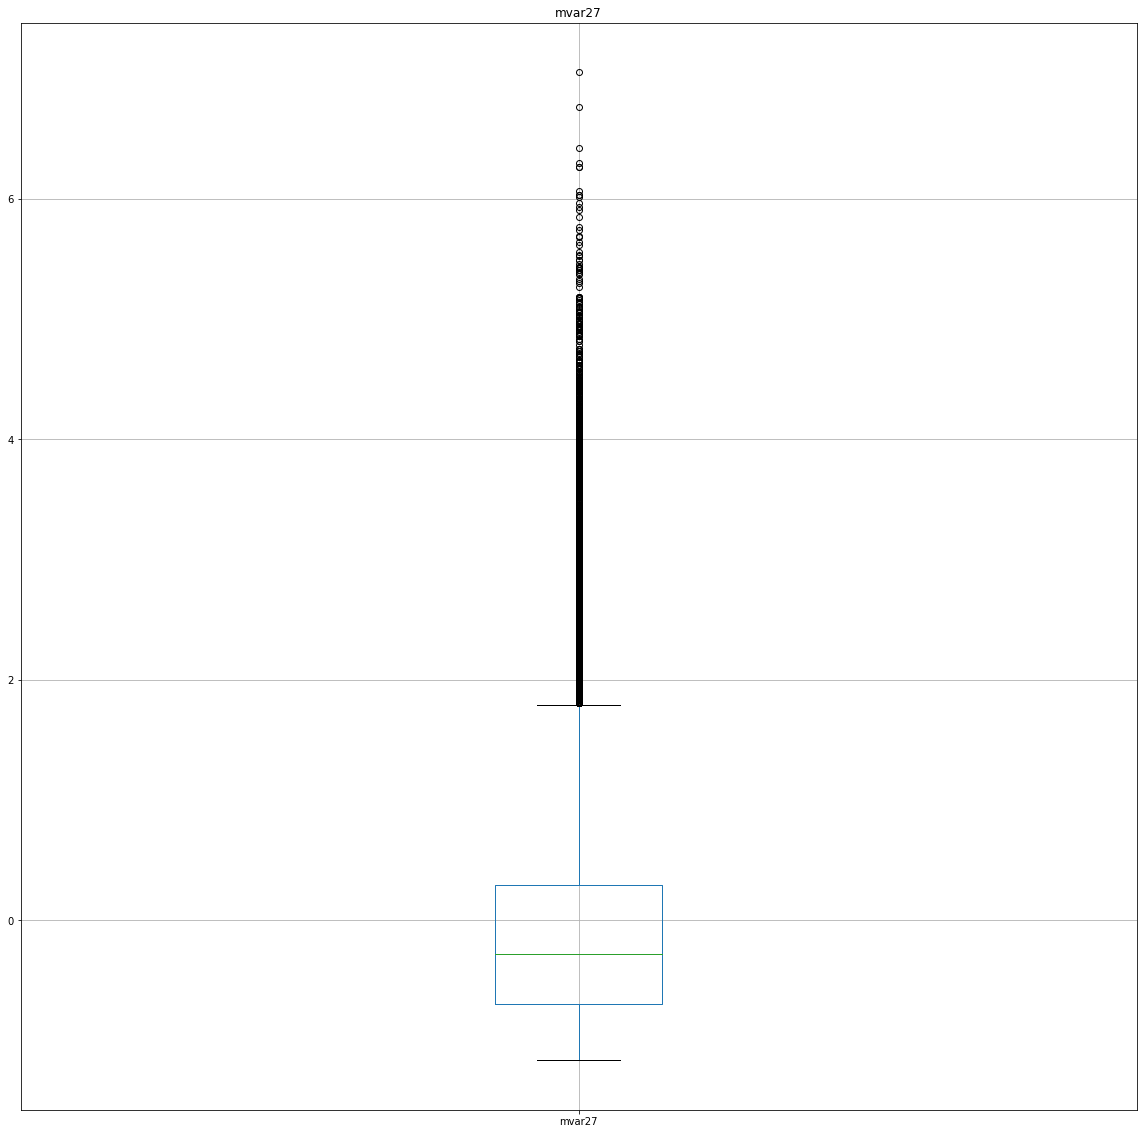

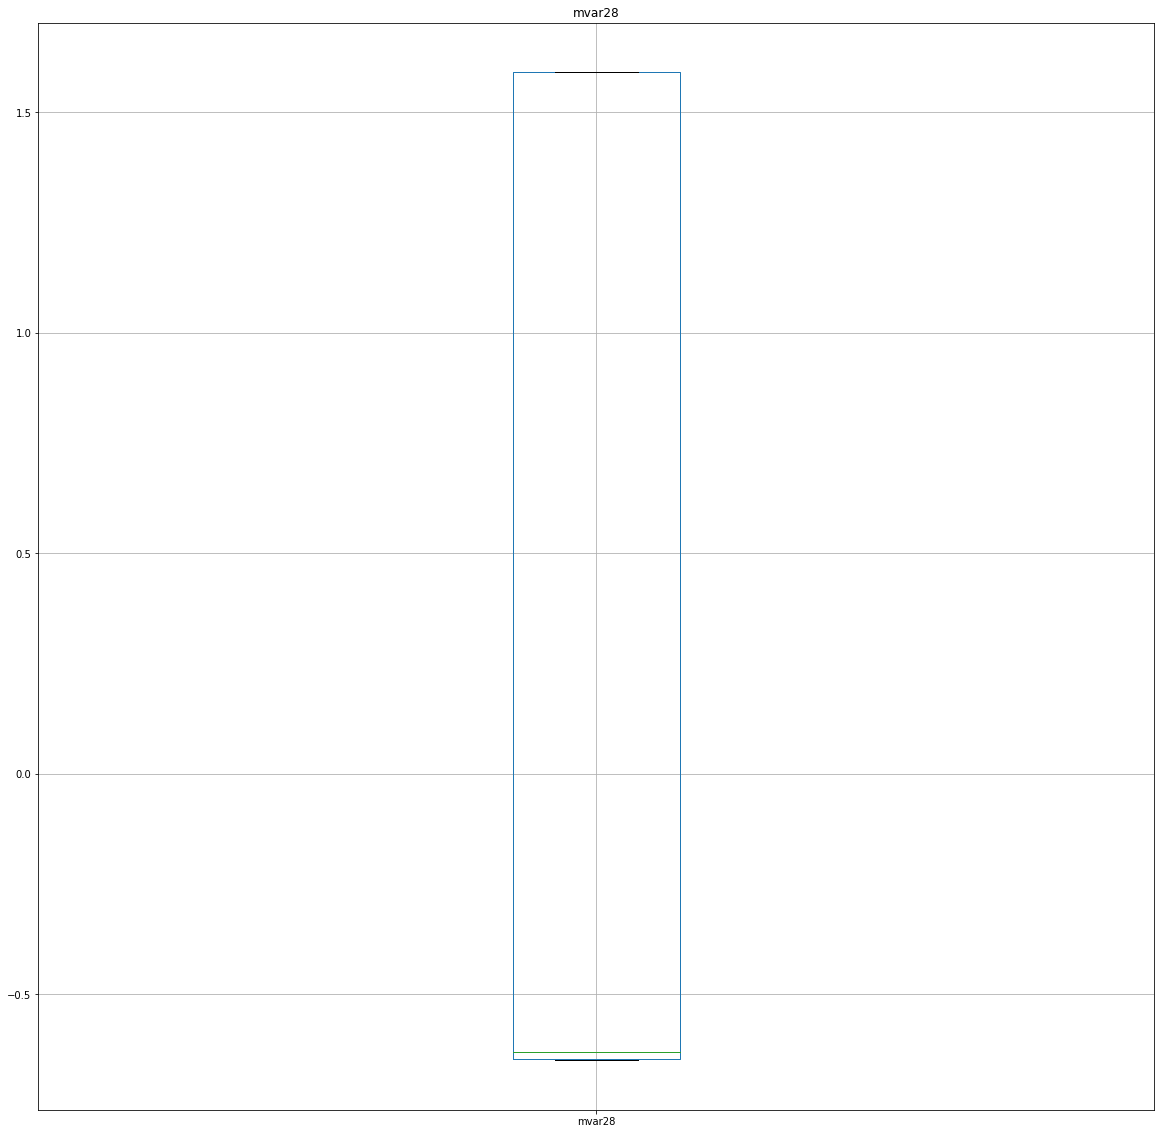

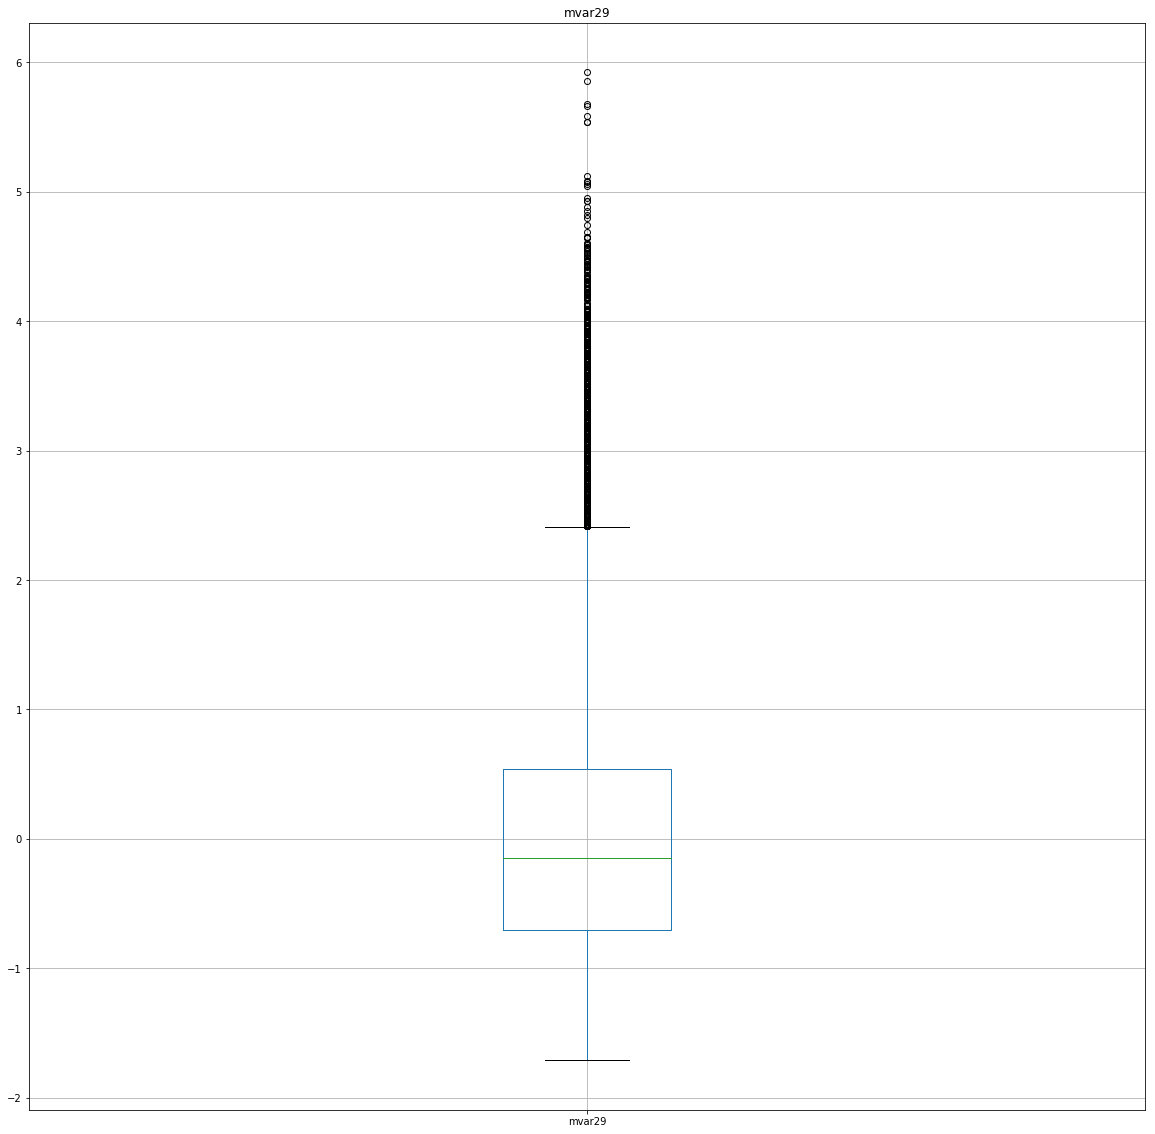

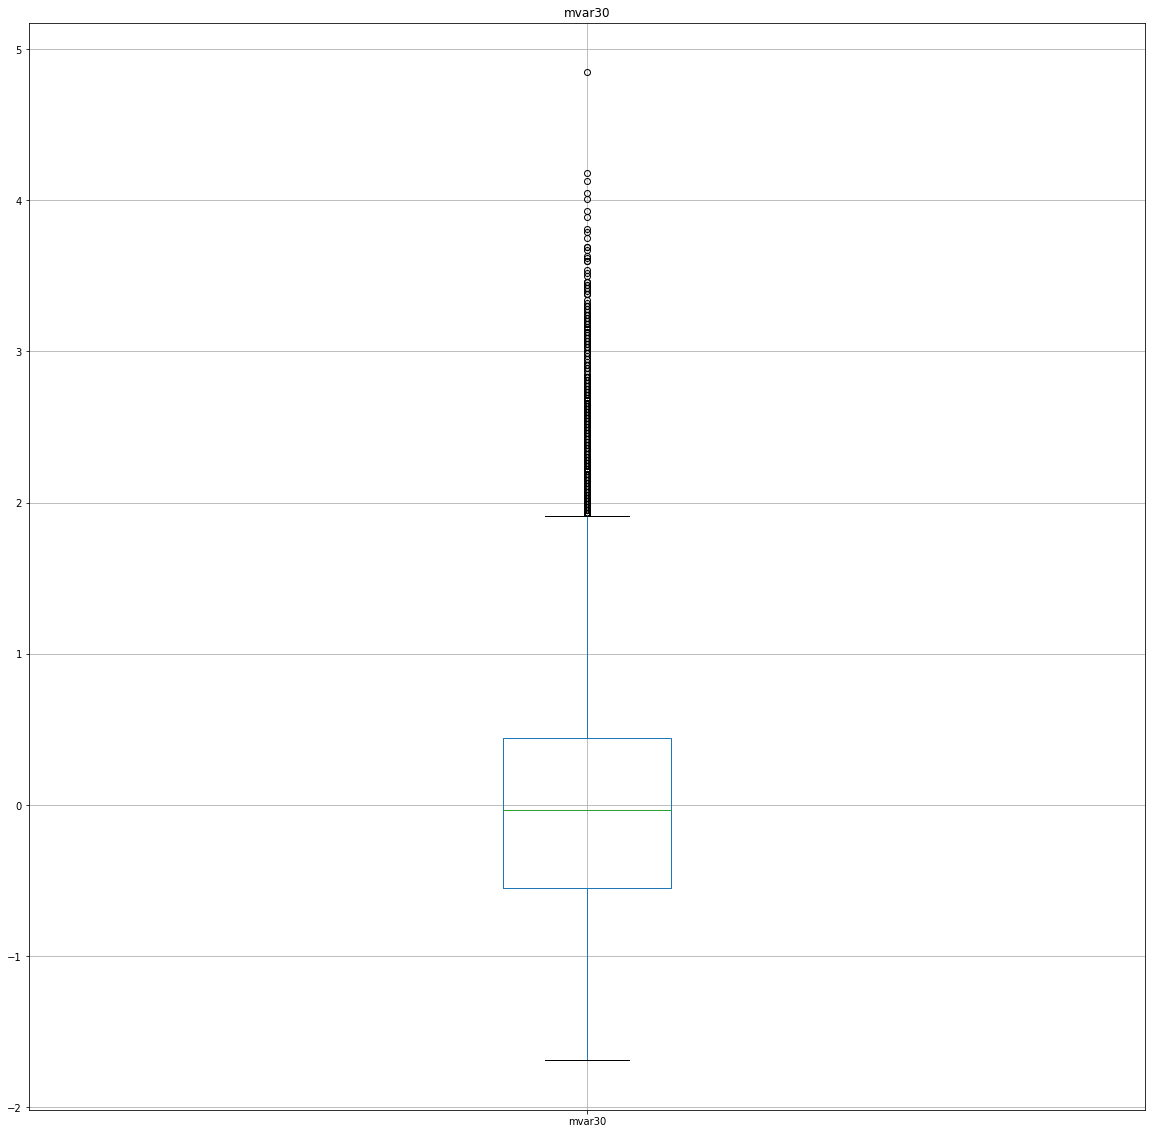

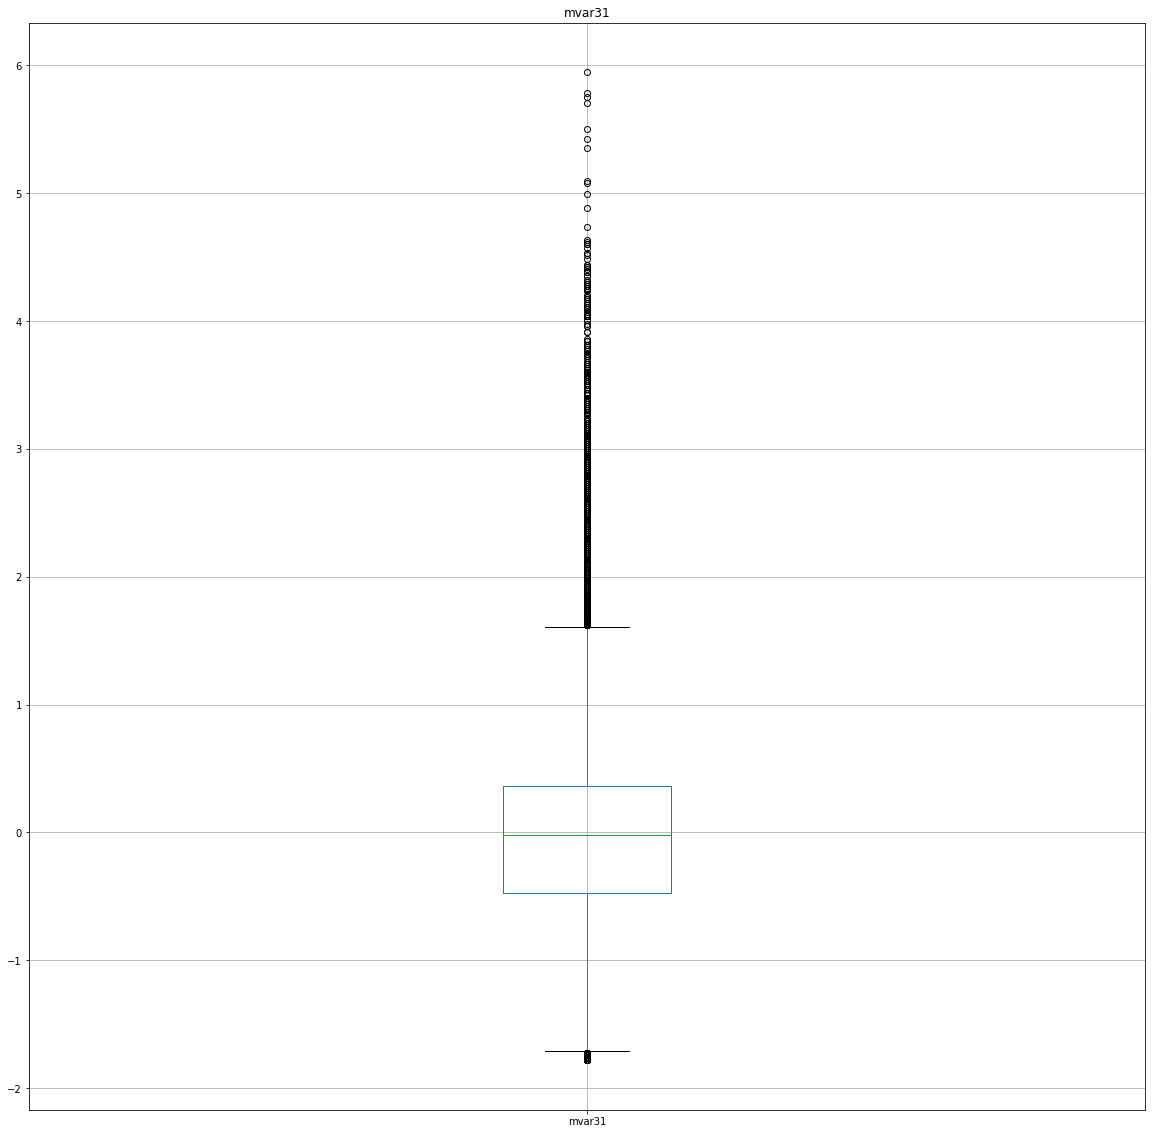

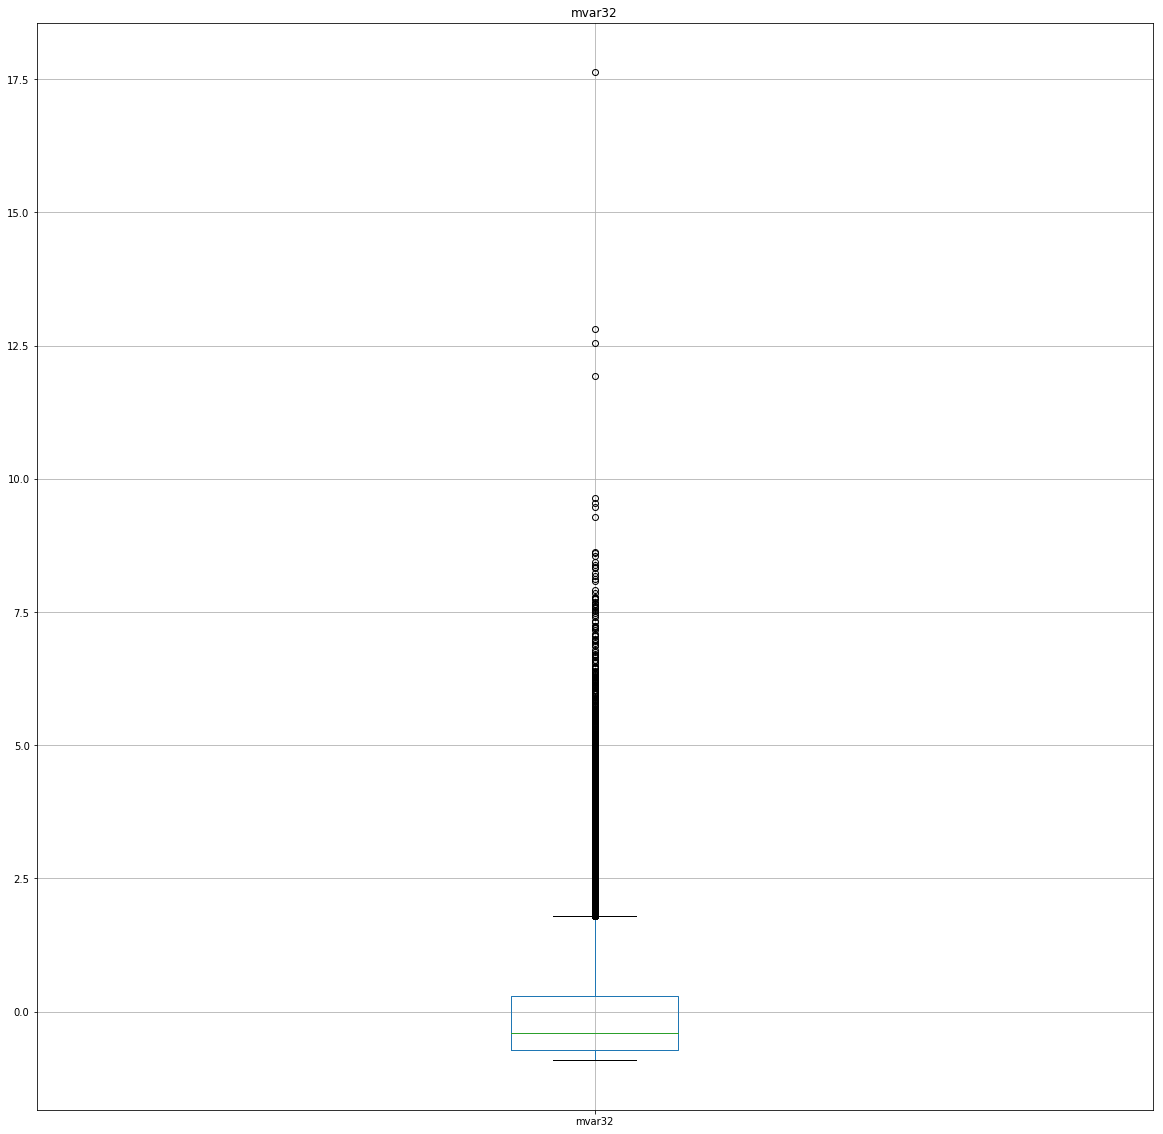

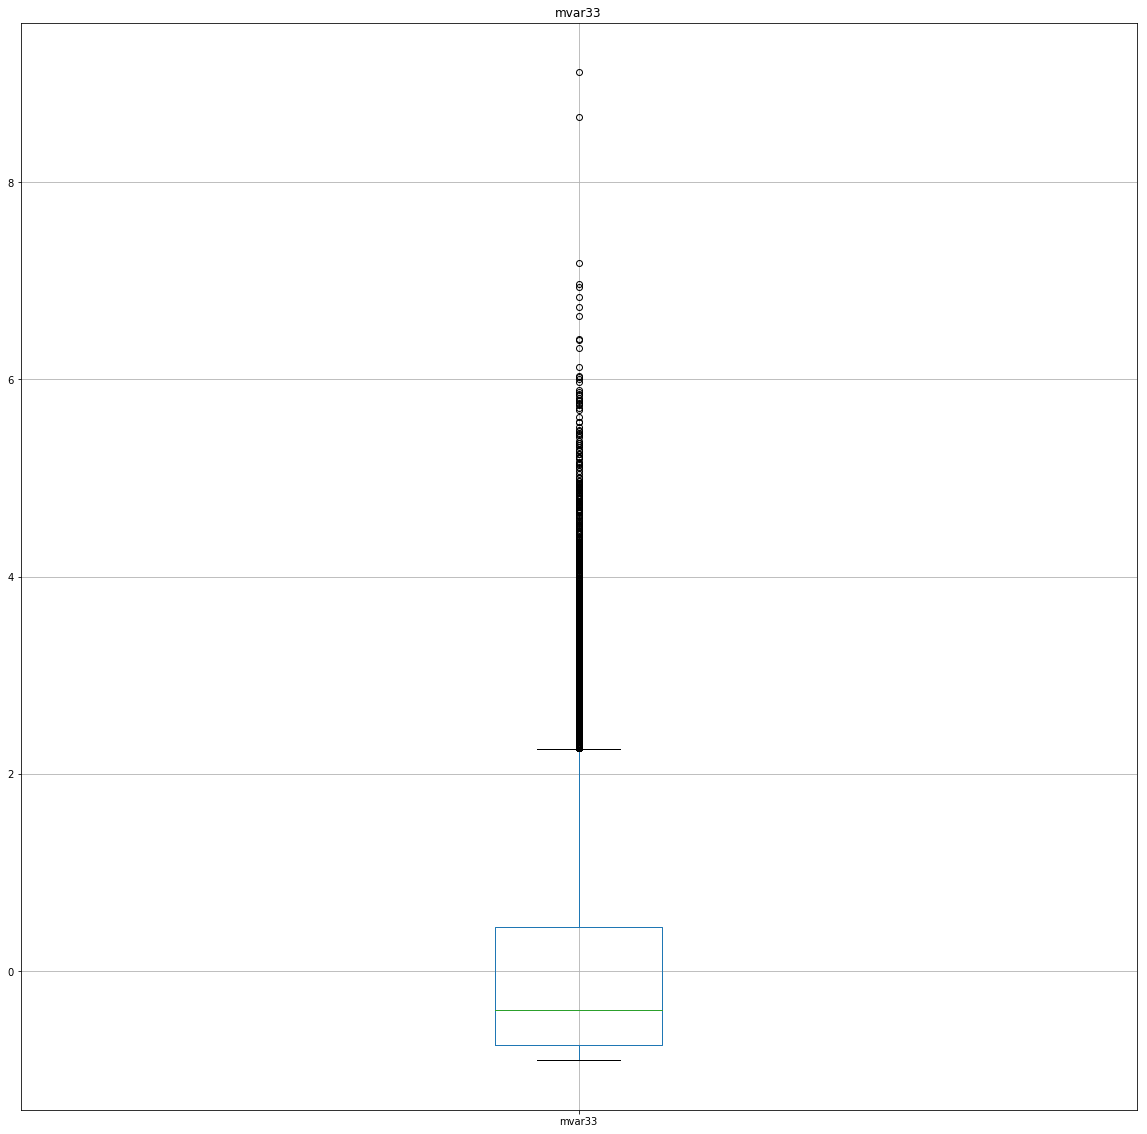

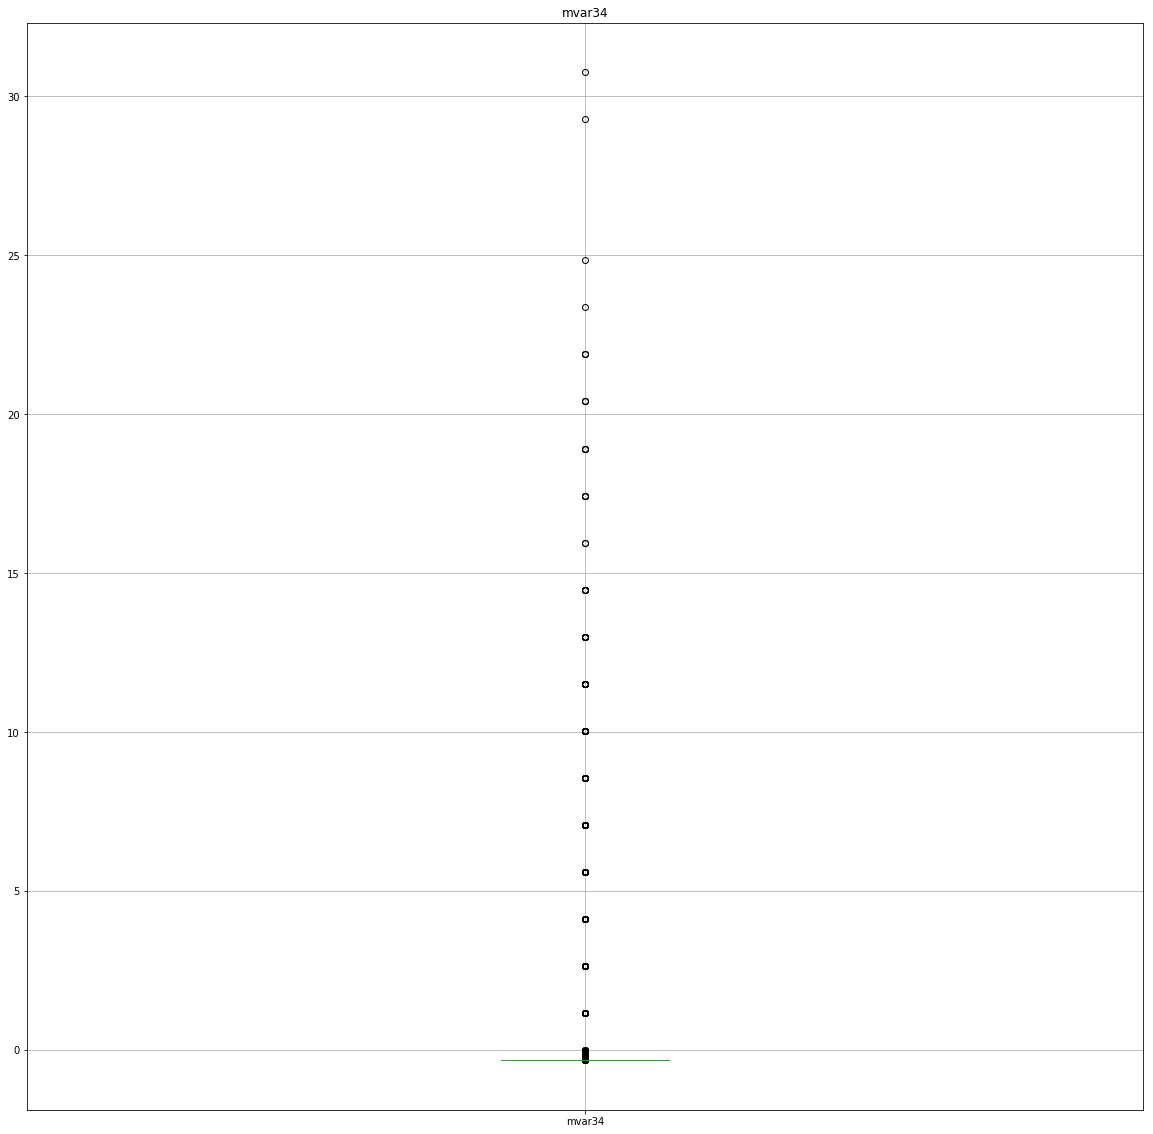

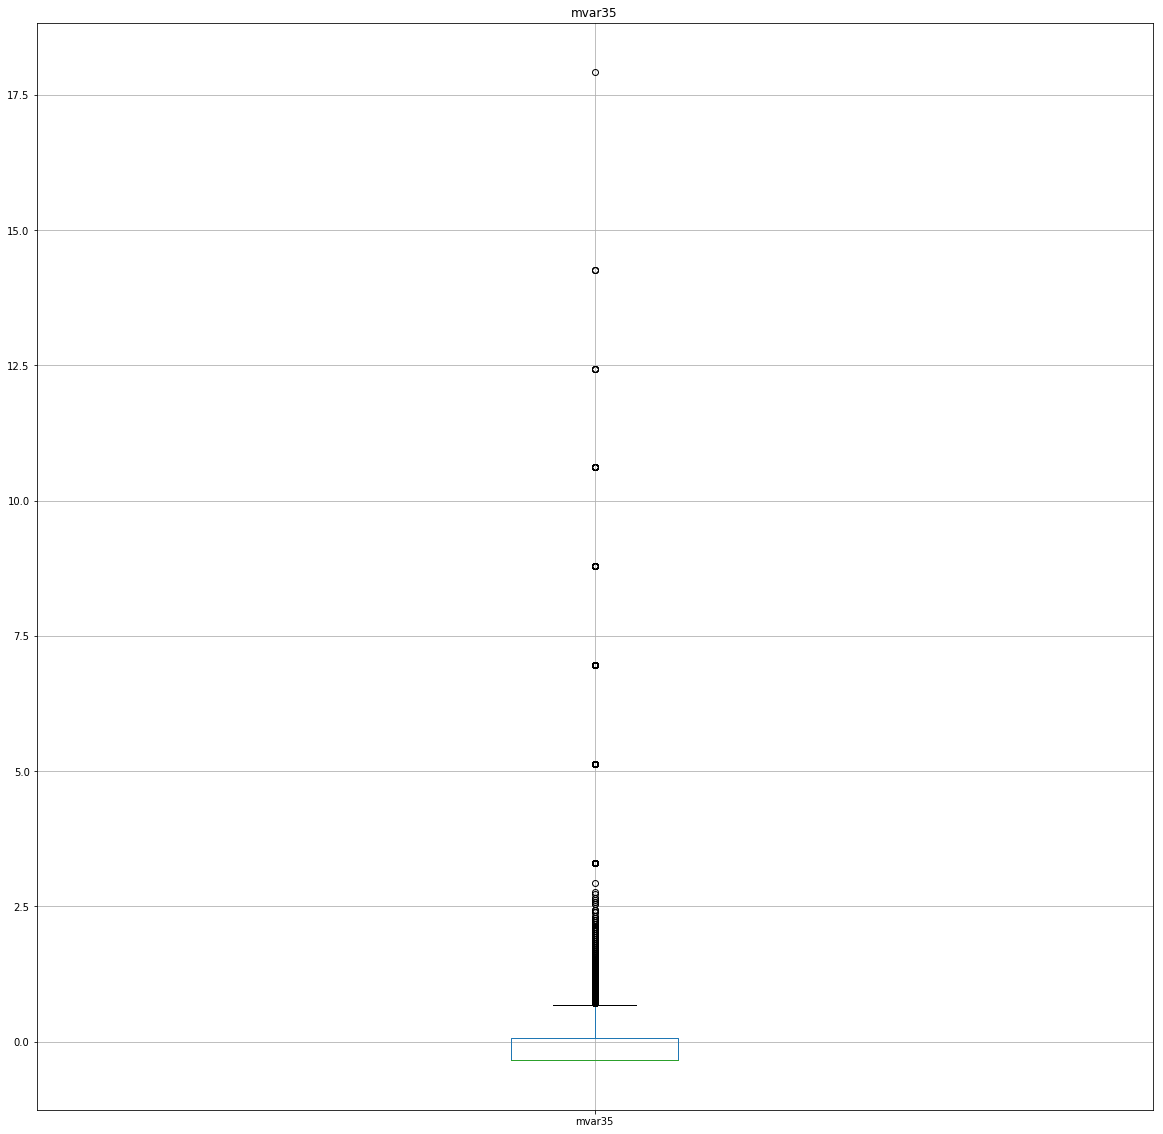

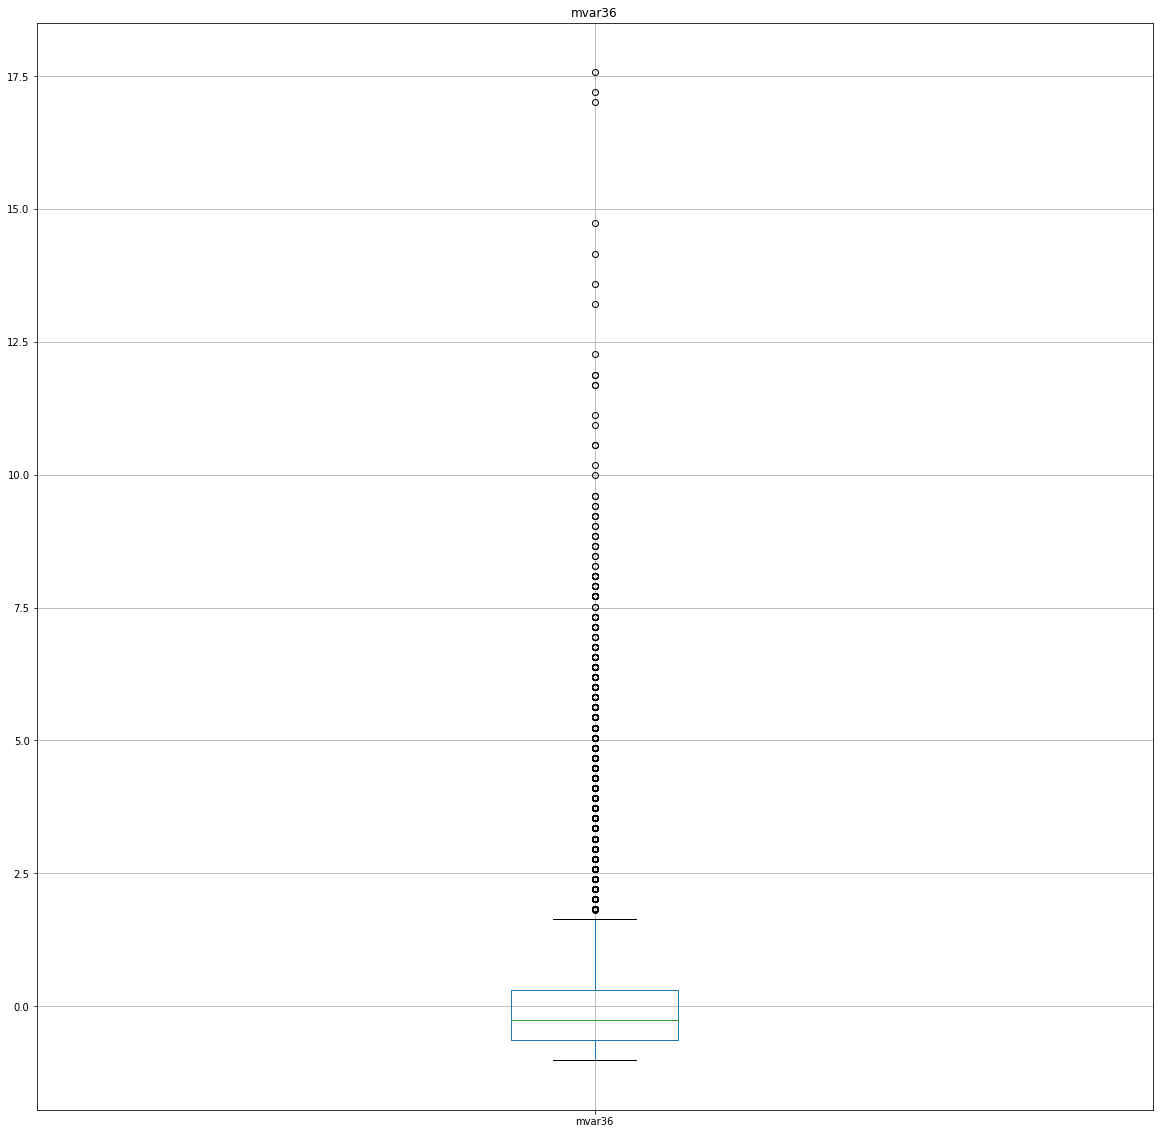

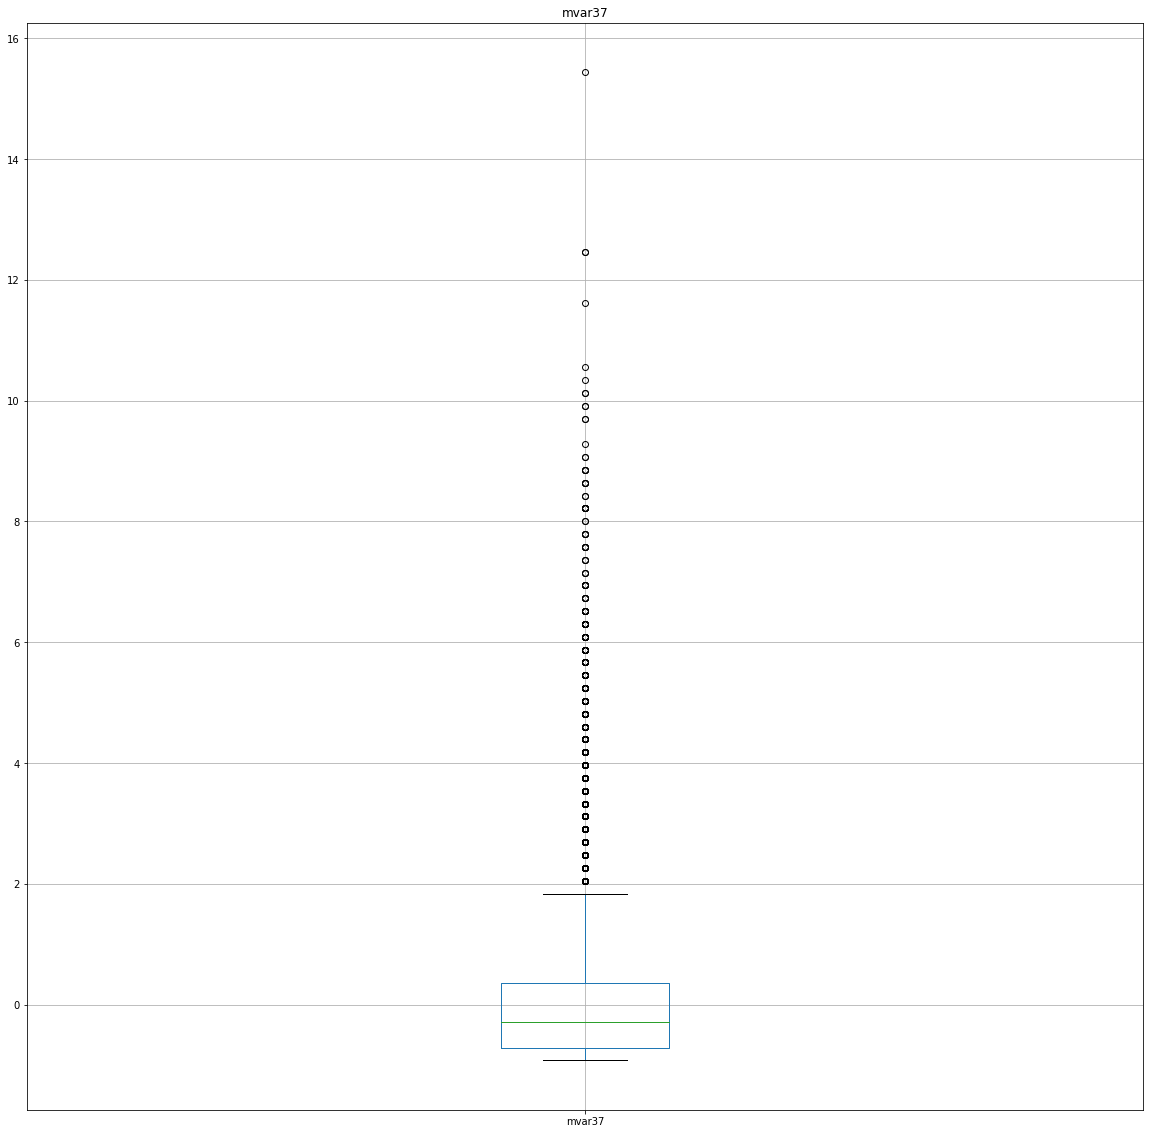

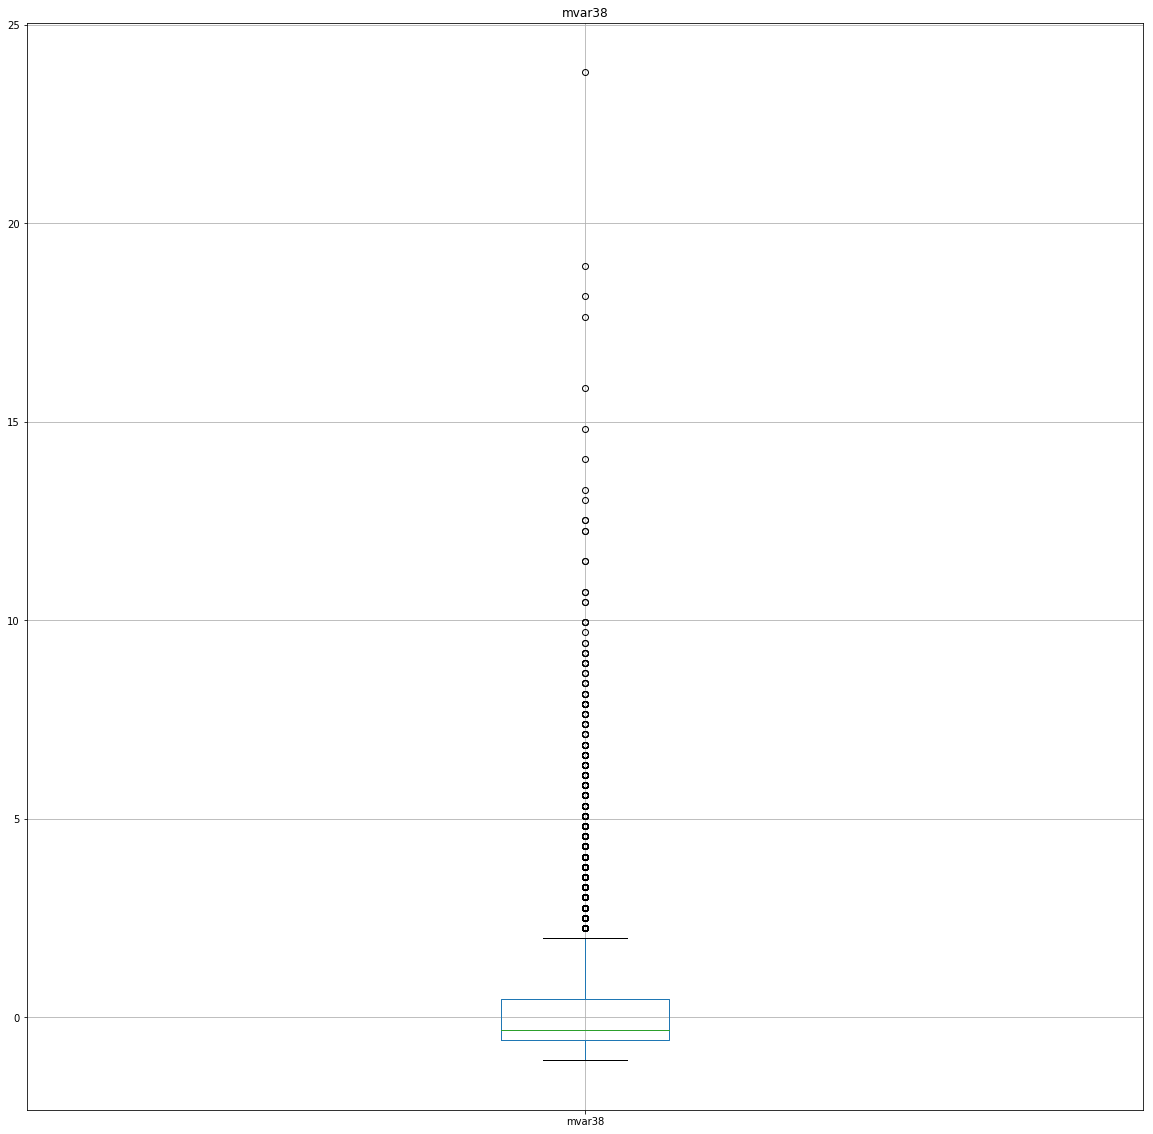

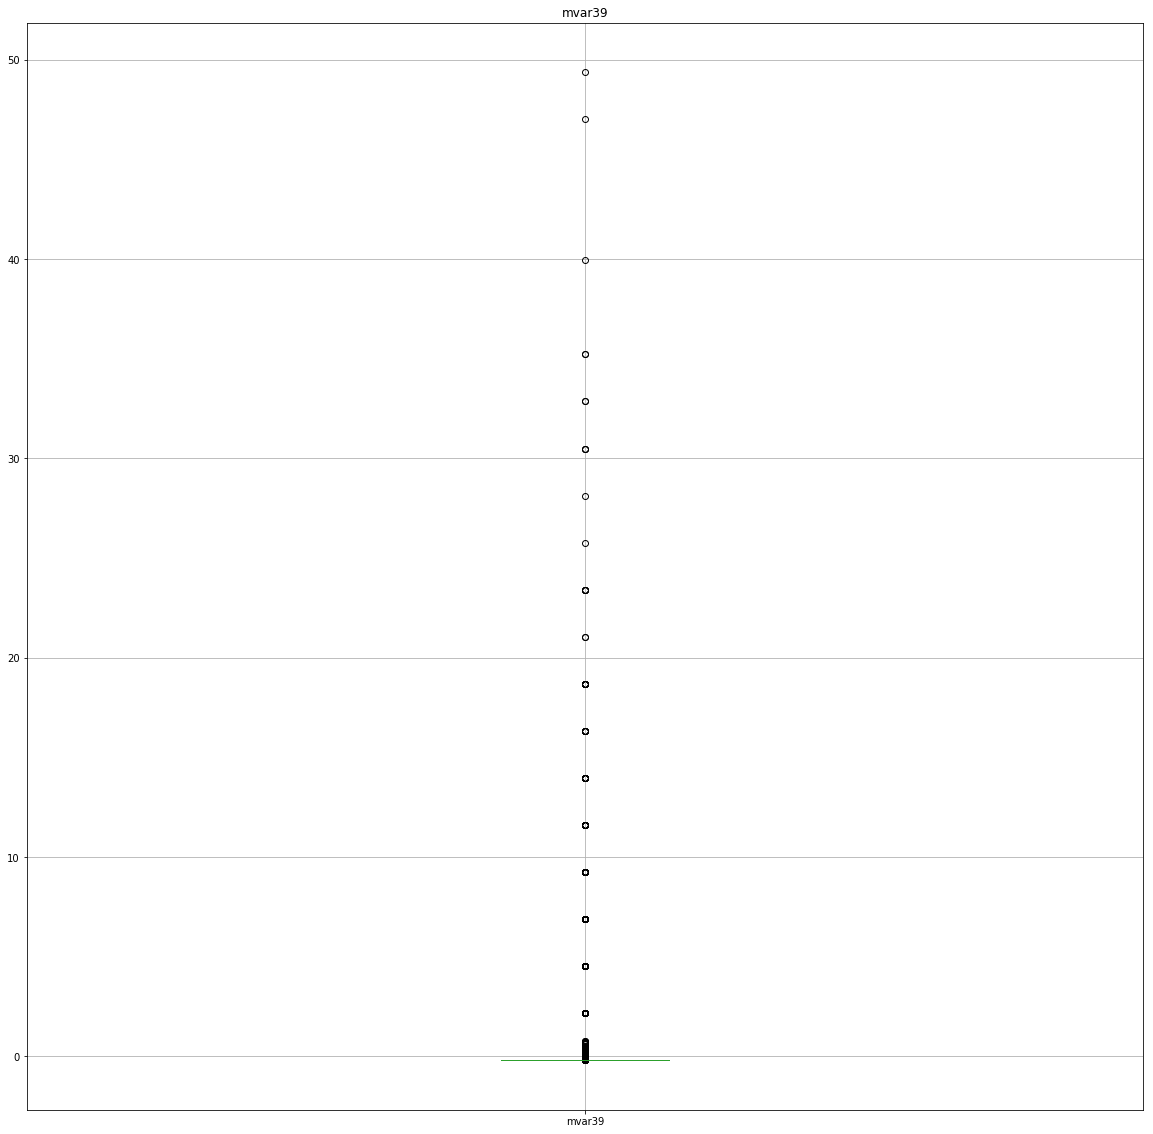

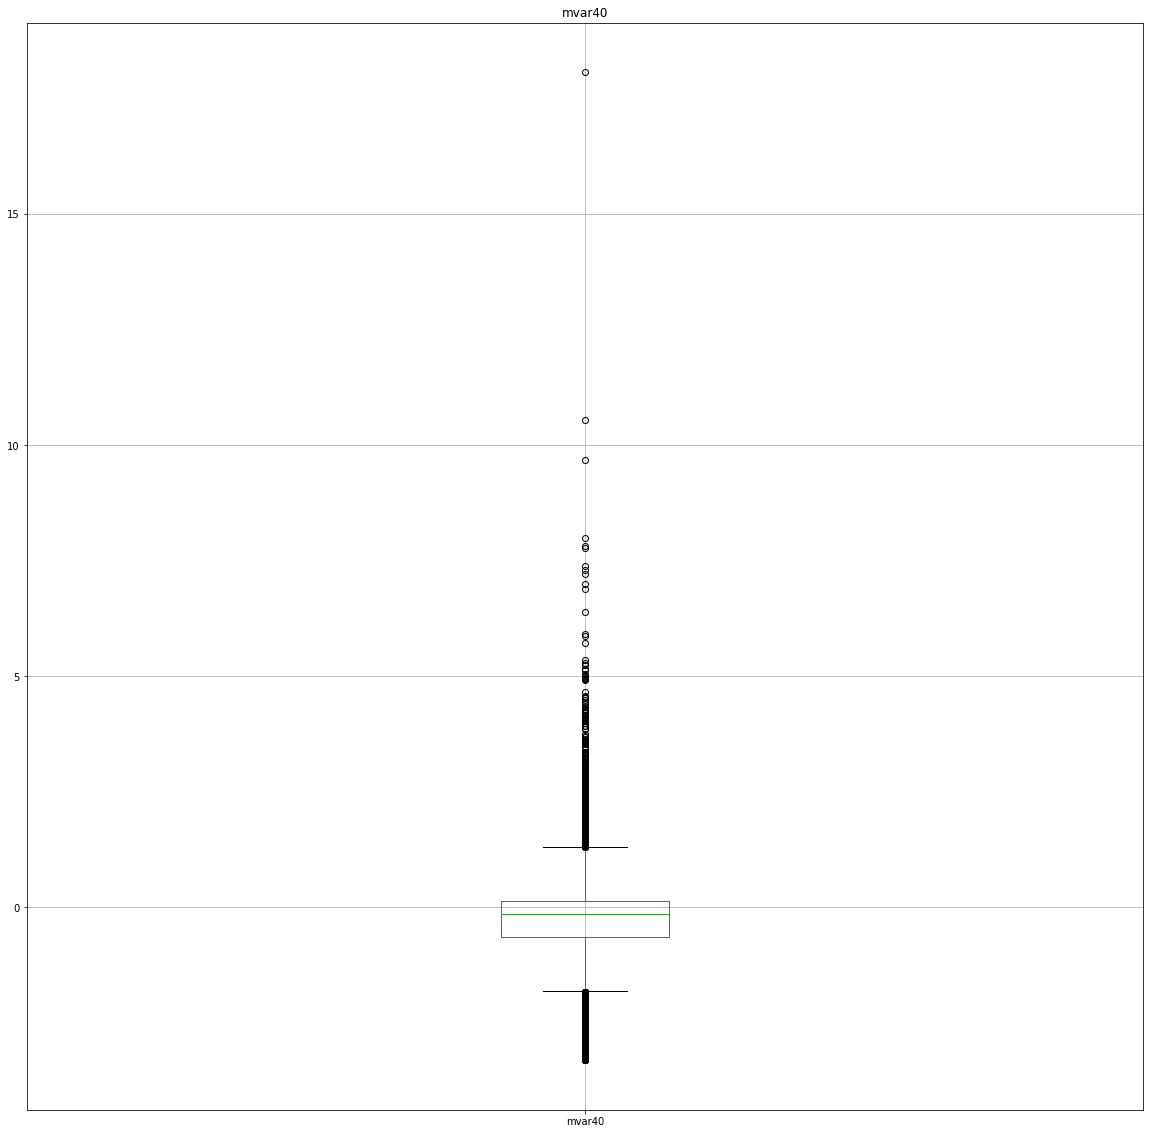

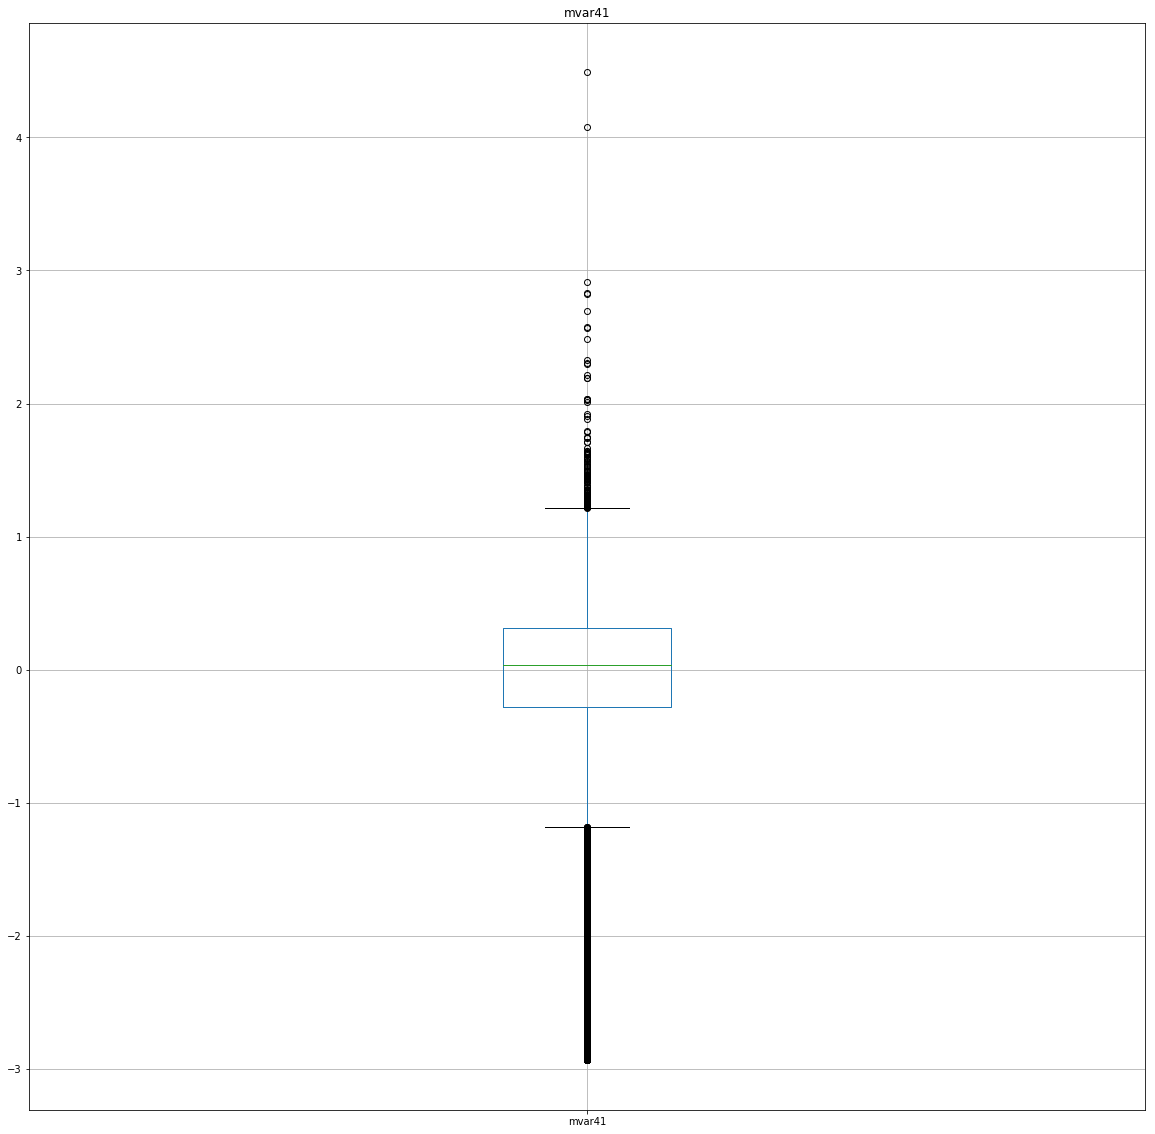

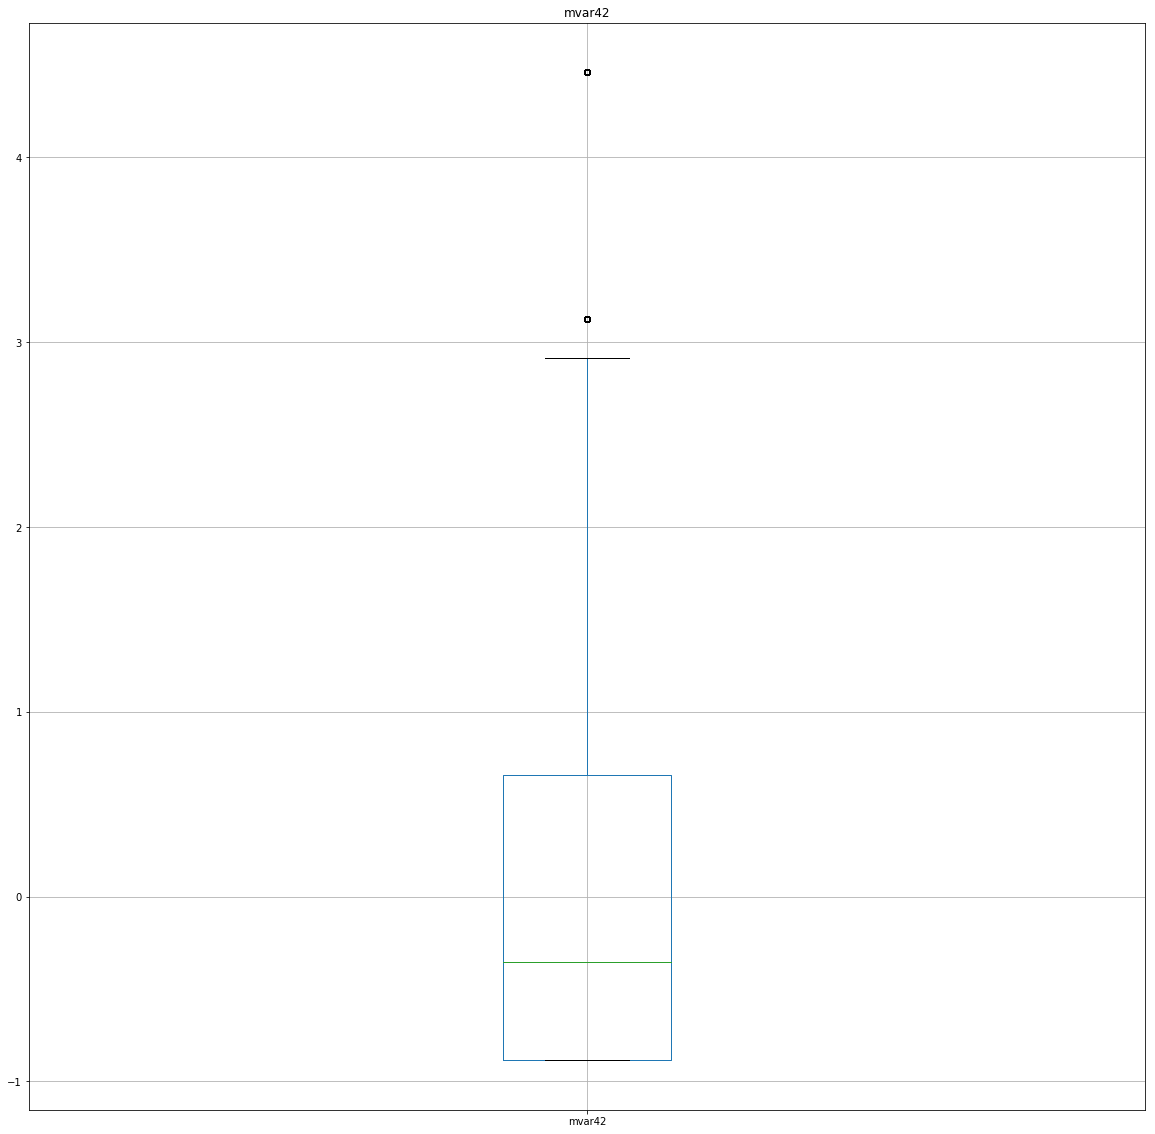

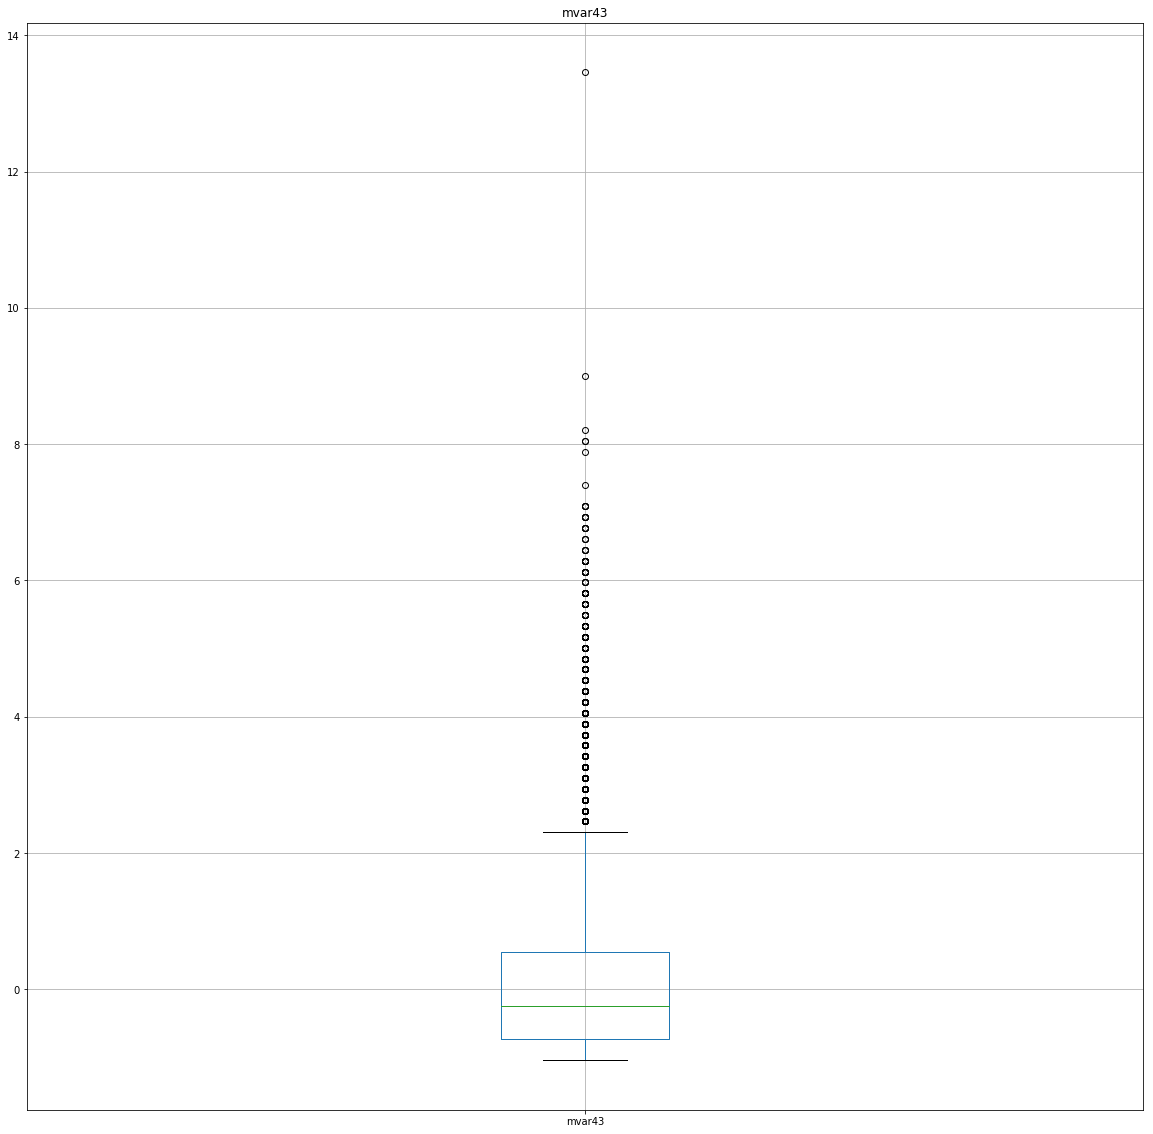

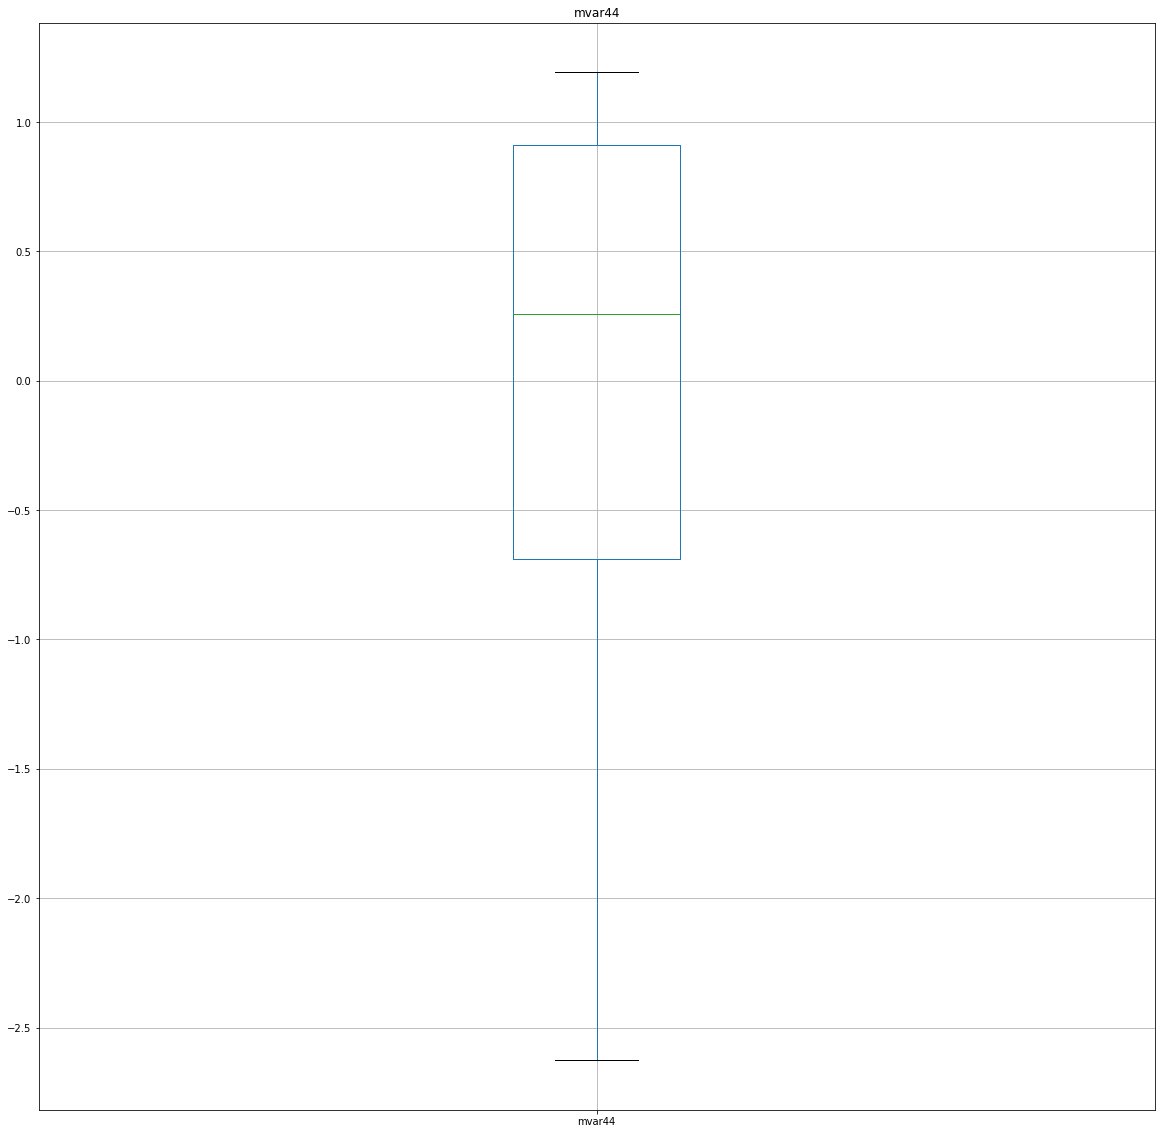

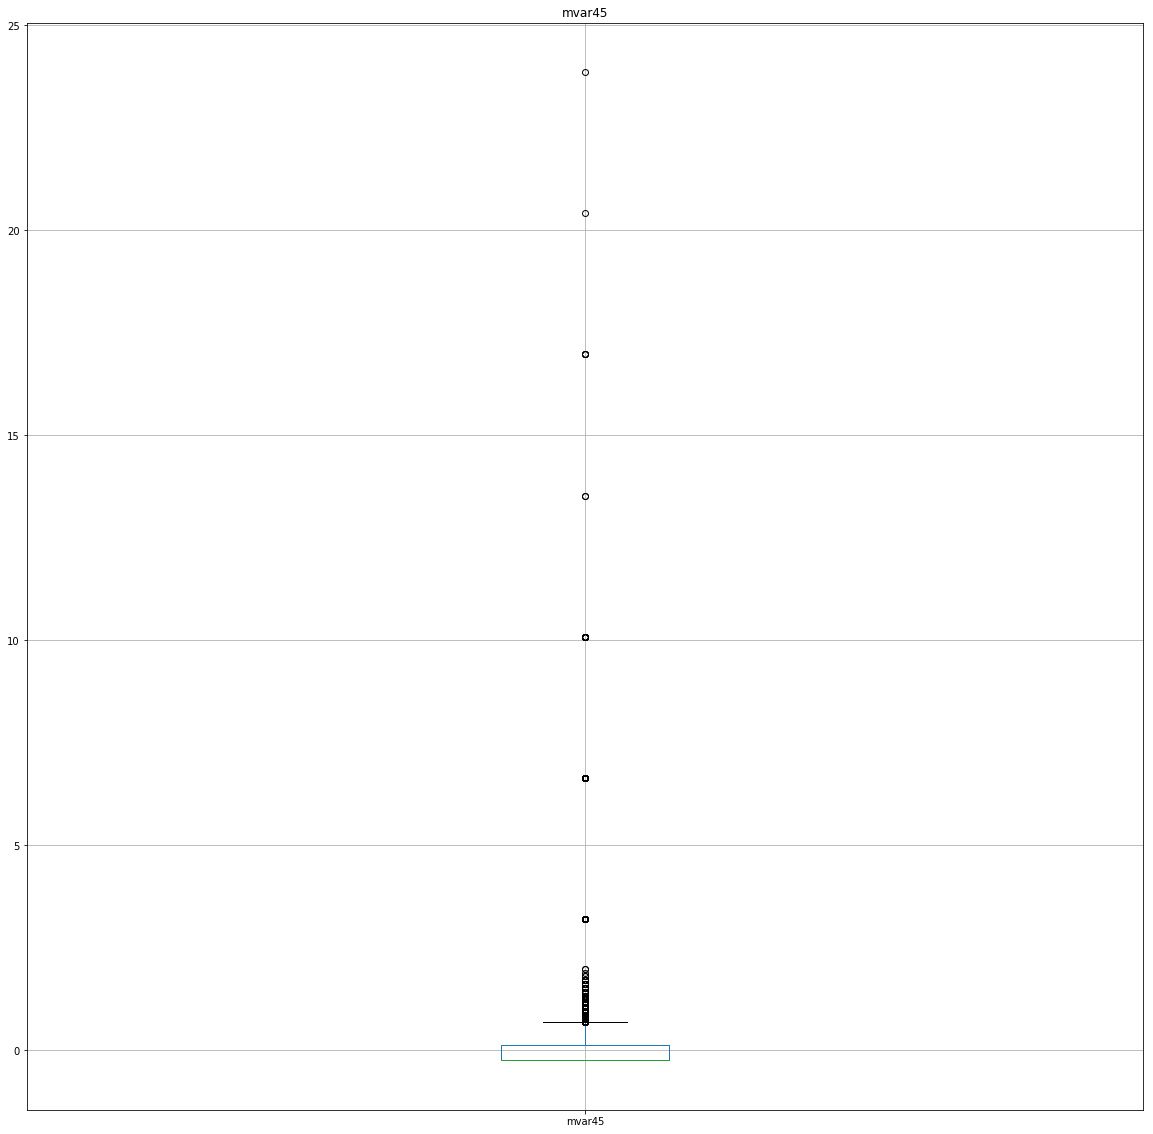

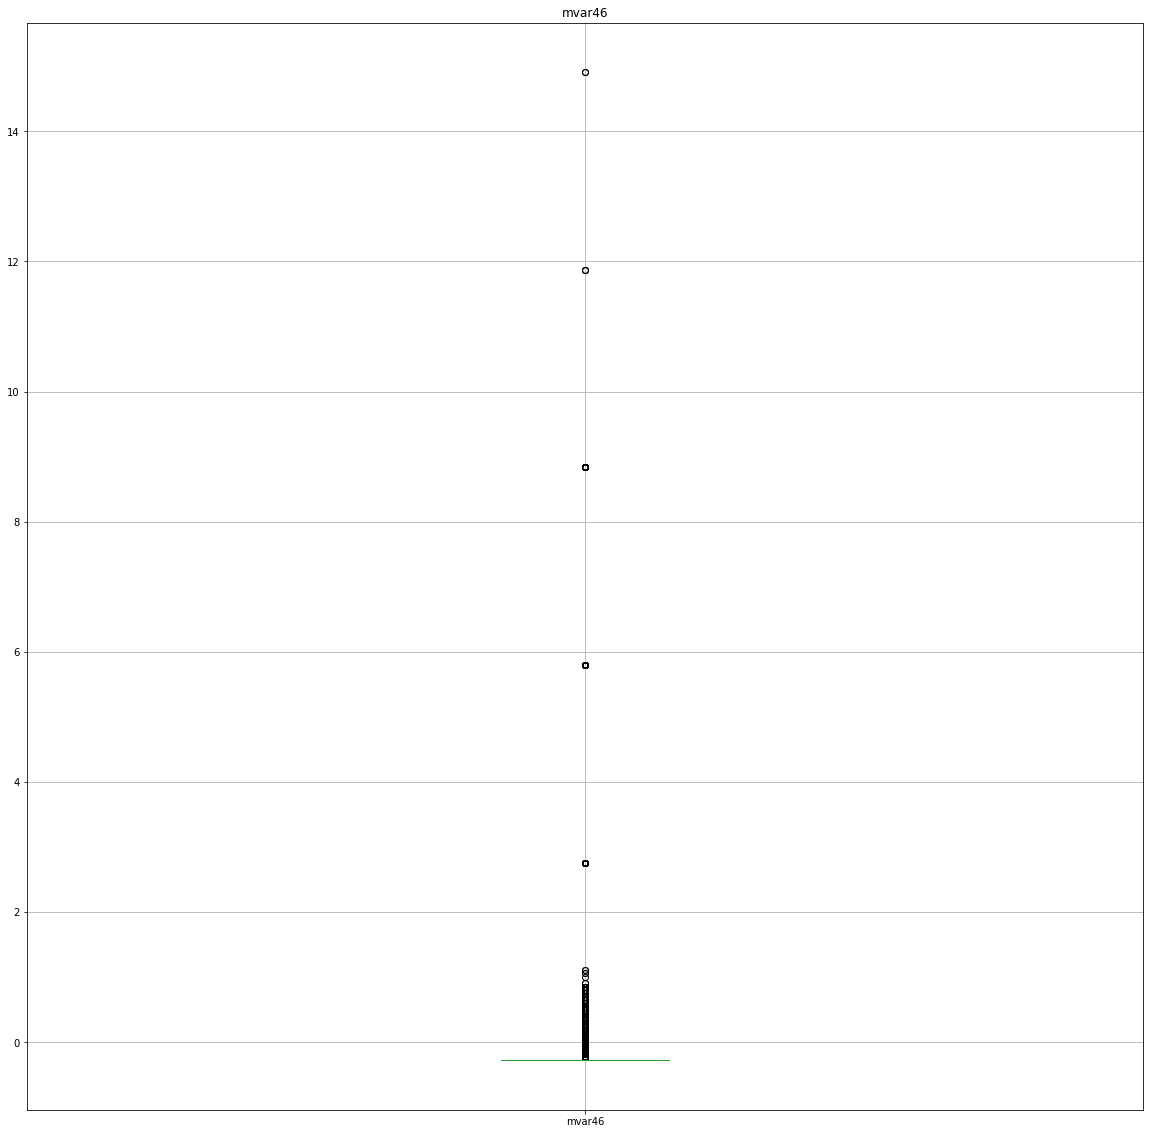

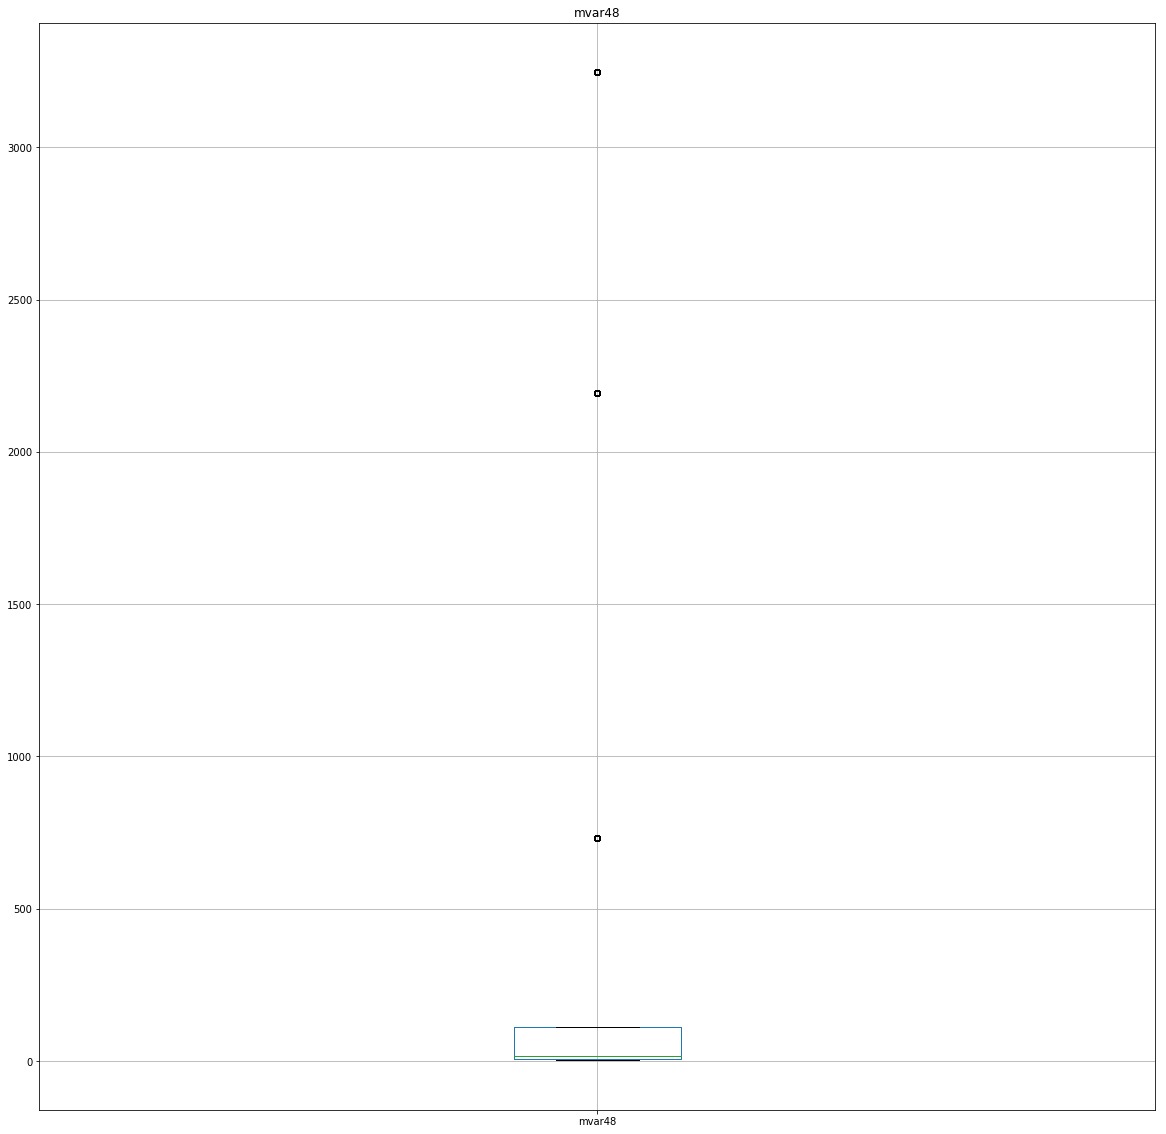

In [15]:
for i in range(1,49):
    if i!=47:
        plt.figure(figsize=[20,20])
        data.boxplot(column=['mvar{}'.format(i)])
        plt.title('mvar{}'.format(i))
        plt.show()

In [16]:
def RemoveOutlier(data):
    cutoffs = [2000,17,150,16,75,40000,1000000,100000,450000,1000000,250000,120000,1000000,0.06*10**9,0.4*10**7,6,8,8,15,20,300,30000,25000,6000,11500,19000,18000,35000,21000,8000,13200,5000,55,10,8,60,50,50,10,275,150,3,55,2,5,4,'random',4000]
    for i in range(len(cutoffs)):
        if (i!= 46):
            var = 'mvar' + str(i+1)
            data = data[~(data[var]>cutoffs[i])]
    return(data)

In [6]:
print('The percentage values removed is {}'.format((len(data)-len(data_clean))/len(data)*100))

The perventage values removed is 0.9024096385542169


Using box plots and comparing them with the meanings of variables, we removed the values of the variables which are logicaly beyond bounds.
Since only 0.9024 % values are removed, won't create a negative impact on training

In [5]:
data_clean = RemoveOutlier(data)

## Encoding

In [9]:
def encoding(train_data,test_data=None):
    
    counts = train_data.groupby('mvar48')['default_ind'].count()
    means = train_data.groupby('mvar48')['default_ind'].mean()
    m = 0
    smooth_mean = (counts * means + m * train_data['mvar48'].mean()) / (counts + m)
    enc_48 = dict(smooth_mean)
    train_data['mvar48'] = train_data['mvar48'].map(enc_48)
    train_data = train_data.replace({'C':0,'L':1})
    if test_data==None:
        return train_data
    else:
        test_data = test_data.replace({'C':0,'L':1})
        test_data['mvar48'] = test_data['mvar48'].map(enc_48)
        return train_data, test_data       

In [12]:
data.columns

Index(['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8',
       'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13', 'mvar14', 'mvar15',
       'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20', 'mvar21', 'mvar22',
       'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27', 'mvar28', 'mvar29',
       'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34', 'mvar35', 'mvar36',
       'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41', 'mvar42', 'mvar43',
       'mvar44', 'mvar45', 'mvar46', 'mvar47', 'mvar48'],
      dtype='object')

In [11]:
data_clean.columns

Index(['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8',
       'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13', 'mvar14', 'mvar15',
       'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20', 'mvar21', 'mvar22',
       'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27', 'mvar28', 'mvar29',
       'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34', 'mvar35', 'mvar36',
       'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41', 'mvar42', 'mvar43',
       'mvar44', 'mvar45', 'mvar46', 'mvar47', 'mvar48'],
      dtype='object')

## ...

# Bayesian Encoding

In [7]:
# !pip install git+https://github.com/MaxHalford/xam --upgrade

In [8]:
def BayesianEncode(data):
    import xam
    encoder = xam.feature_extraction.BayesianTargetEncoder(columns=['mvar48'],prior_weight=0,suffix='')
    mvar48 = encoder.fit_transform(pd.DataFrame(data.mvar48),data.default_ind)
    data.mvar48 = mvar48
    data = data.replace({'C':0,'L':1})
    return(data)

# Normalization

In [9]:
def StandardScale(data):
    # Normalizing the data
    data = data - data.mean()
    data = data/data.std()
    return(data)

# PCA

In [10]:
# Rough estimate for PCA
def PCA(X):
    
    from sklearn.decomposition import PCA

    N = range(1,49)
    variance = []
    for i in range(len(N)):
        pca = PCA(n_components = N[i])
        pca.fit(X)
        variance.append(sum(pca.explained_variance_))
    
    plt.figure(figsize = [20,20])
    plt.plot(N,variance/variance[len(variance)-1])
    plt.scatter(N,variance/variance[len(variance)-1])
    plt.xlabel('Number of components')
    plt.ylabel('Variance captured')
    plt.show()
    print(variance/variance[len(variance)-1])
    
    pca = PCA(n_components = 13) # The number of components can be chosen after inspecting the variances after imputation
    pca.fit(X)
    X_new = pca.transform(X)
    
    return(X_new)
    


In [11]:
# Implementing all the functions
data.describe()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar48,default_ind
count,83000.000000,79267.000000,77114.000000,82465.000000,82465.000000,82465.000000,63299.000000,7.532600e+04,63291.000000,71318.000000,...,76671.000000,17930.000000,25736.000000,80977.000000,82111.000000,74851.000000,37080.000000,59397.000000,83000.000000,83000.000000
mean,318146.931060,1747.511865,1.054816,5.401784,0.461151,1.084012,1633.429280,1.750797e+04,6822.332227,34030.596329,...,0.087673,97.851158,72.016570,0.331550,6.553604,0.706595,0.070523,0.093187,556.021277,0.287410
std,97179.489955,94.830127,1.556682,11.091569,1.704292,5.743899,3667.183981,4.677222e+04,10060.346814,50673.150005,...,0.423403,29.530657,24.508469,0.373973,6.273107,0.245915,0.290383,0.329054,1106.953295,0.452557
min,230032.000000,1477.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.014000,0.000000,0.000000,0.000000,0.060660,0.000000,0.000000,2.000000,0.000000
25%,250781.750000,1680.000000,0.131800,0.000000,0.000000,0.000000,41.000000,1.750250e+03,496.000000,3542.250000,...,0.000000,90.149500,58.174750,0.000000,2.000000,0.515280,0.000000,0.000000,8.000000,0.000000
50%,271531.500000,1743.000000,0.513000,0.300000,0.000000,0.000000,297.000000,7.020500e+03,2507.000000,14389.000000,...,0.000000,100.000000,78.839500,0.200000,5.000000,0.739500,0.000000,0.000000,17.000000,0.000000
75%,362296.250000,1813.000000,1.386200,6.595000,0.000000,0.000000,1381.000000,1.811300e+04,9869.500000,44413.000000,...,0.000000,111.327000,91.596750,0.571430,10.000000,0.945120,0.000000,0.000000,111.000000,1.000000
max,578068.000000,1950.000000,31.018100,399.334000,25.754000,165.492000,94302.000000,5.637108e+06,291810.000000,840658.000000,...,21.000000,631.360000,182.111000,2.000000,91.000000,1.000000,7.000000,5.000000,3247.000000,1.000000


In [12]:
data1 = RemoveOutlier(data)
data1.describe()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar48,default_ind
count,82251.000000,78533.000000,76417.000000,81717.000000,81717.000000,81717.000000,62745.000000,74666.000000,62738.000000,70671.000000,...,75990.000000,17773.000000,25541.000000,80243.000000,81367.000000,74195.000000,36720.000000,58905.000000,82251.000000,82251.000000
mean,318097.076498,1747.620835,1.042416,5.261837,0.447723,0.995439,1591.640338,16911.030442,6682.640234,33306.814294,...,0.084327,97.589507,72.050884,0.331307,6.530301,0.706874,0.069717,0.090366,556.399740,0.286902
std,97144.518764,94.585964,1.480058,10.369293,1.630173,4.910188,3387.600080,35988.916961,9354.077049,47594.249242,...,0.371150,28.714157,24.459287,0.373786,6.205019,0.245624,0.285812,0.317181,1107.262699,0.452318
min,230032.000000,1477.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.014000,0.000000,0.000000,0.000000,0.060660,0.000000,0.000000,2.000000,0.000000
25%,250757.500000,1680.000000,0.131500,0.000000,0.000000,0.000000,41.000000,1748.250000,496.000000,3532.000000,...,0.000000,89.944000,58.251000,0.000000,2.000000,0.515680,0.000000,0.000000,8.000000,0.000000
50%,271511.000000,1743.000000,0.511400,0.300000,0.000000,0.000000,297.000000,6983.500000,2486.000000,14315.000000,...,0.000000,100.000000,78.882000,0.200000,5.000000,0.739660,0.000000,0.000000,17.000000,0.000000
75%,362276.500000,1813.000000,1.382100,6.552000,0.000000,0.000000,1366.000000,17976.750000,9774.750000,44023.500000,...,0.000000,111.256000,91.609000,0.565220,10.000000,0.944970,0.000000,0.000000,111.000000,1.000000
max,578068.000000,1950.000000,16.985700,144.006000,15.889000,74.919000,39927.000000,919758.000000,99100.000000,449934.000000,...,10.000000,272.546000,143.352000,2.000000,53.000000,1.000000,5.000000,3.000000,3247.000000,1.000000


In [13]:
data2 = BayesianEncode(data)
data2.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,default_ind
0,230032.0,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,...,73.780,82.547,0.08696,10.0,0.63899,NaN,0.0,0,0.258550,0.0
1,230033.0,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,...,99.129,NaN,0.00000,13.0,0.63836,NaN,NaN,1,0.280171,1.0
2,230034.0,1745.0,0.4001,0.000,0.0,0.0,NaN,2536.0,NaN,NaN,...,NaN,29.290,0.00000,1.0,1.00000,NaN,0.0,0,0.320883,1.0
3,230035.0,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,...,96.272,NaN,0.15385,3.0,0.53241,0.0,0.0,1,0.310093,0.0
4,230036.0,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,...,115.019,NaN,0.00000,1.0,0.92665,NaN,NaN,1,0.282864,0.0


In [14]:
# This cell can be replaced by any method of imputation
data3 = data2.fillna(data.mean()) # For this case

In [15]:
data4 = StandardScale(data3)

In [16]:
data4.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,default_ind
0,-0.906724,-0.555845,0.399398,-0.488594,-0.271458,-0.189335,-5.100457e-01,-0.257936,-7.399314e-01,1.349404e-01,...,-1.753809e+00,7.716214e-01,-0.662150,0.552358,-0.289491,-1.089699e-13,-3.347674e-01,-0.771251,-0.821929,-0.635079
1,-0.906713,1.062749,-0.163493,-0.488594,-0.271458,-0.189335,-4.781957e-01,-0.223890,-4.156304e-01,-3.362990e-01,...,9.310273e-02,2.315864e-12,-0.897567,1.033172,-0.292189,-1.089699e-13,-8.480365e-14,1.296579,-0.206154,1.574587
2,-0.906703,-0.027105,-0.436340,-0.488594,-0.271458,-0.189335,-7.114046e-14,-0.336014,-1.951495e-13,-1.518023e-13,...,-7.549055e-12,-3.130806e+00,-0.897567,-0.890083,1.256382,-1.089699e-13,-3.347674e-01,-0.771251,0.953342,1.574587
3,-0.906693,-0.091848,-0.556836,-0.488594,-0.271458,-0.189335,1.088428e-01,0.200460,-2.125580e-01,-2.919746e-01,...,-1.150564e-01,2.315864e-12,-0.481067,-0.569541,-0.745875,-3.633570e-01,-3.347674e-01,1.296579,0.646043,-0.635079
4,-0.906682,0.426102,-0.695126,-0.468243,-0.271458,-0.189335,1.192054e+00,-0.269628,-1.512038e-01,-5.544507e-01,...,1.250838e+00,2.315864e-12,-0.897567,-0.890083,0.942291,-1.089699e-13,-8.480365e-14,1.296579,-0.129461,-0.635079


In [19]:
y = data4['default_ind']
X = data4.drop(['application_key','default_ind'],axis=1)

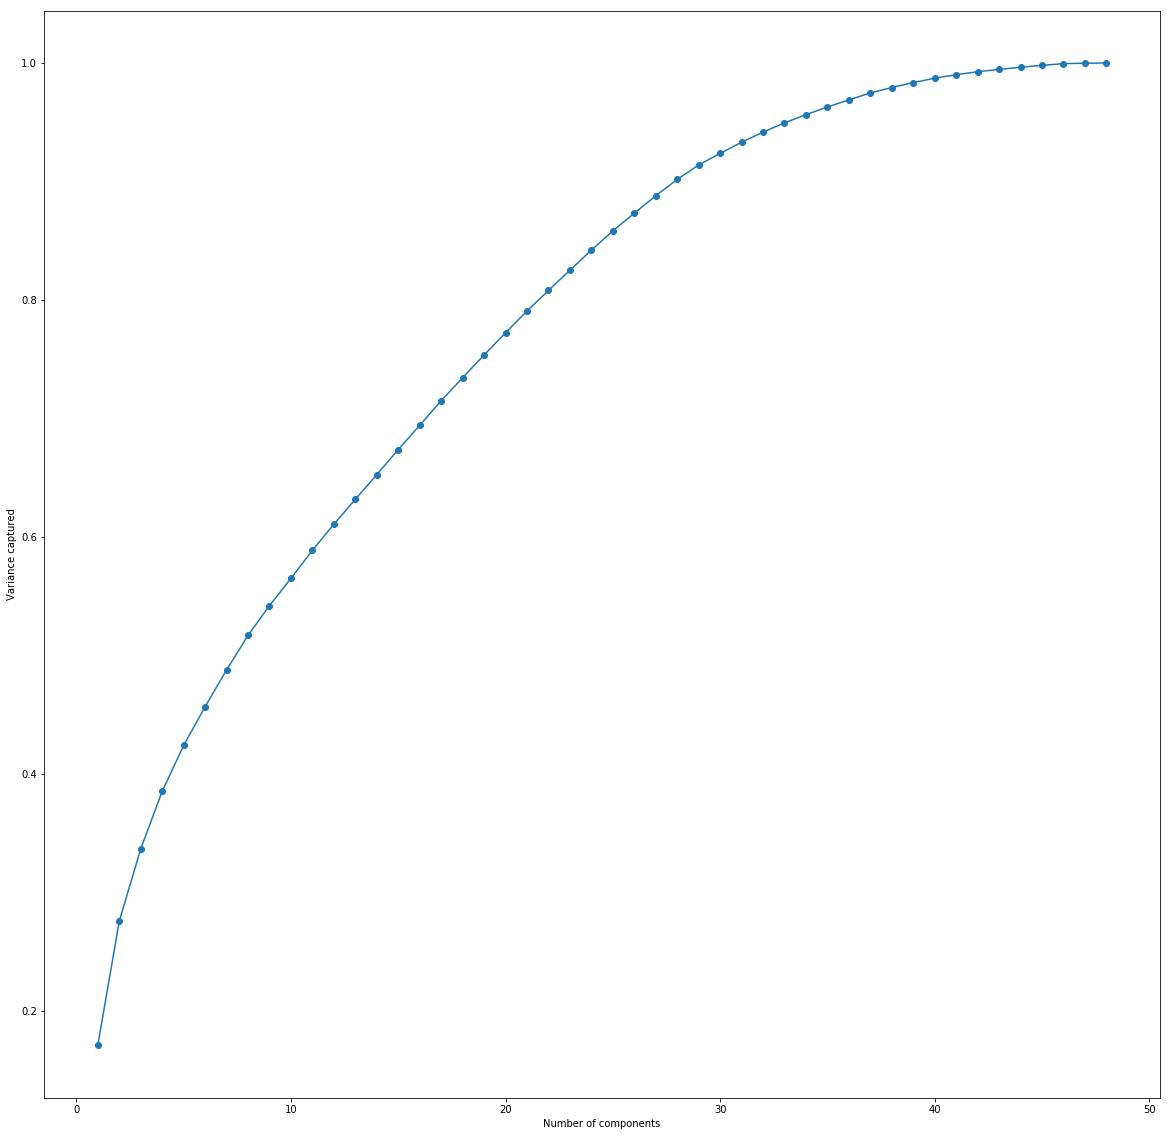

[0.17080242 0.27551334 0.33658557 0.38519708 0.42395017 0.45658432
 0.48770185 0.51681216 0.54196906 0.56494652 0.58867954 0.61061004
 0.63172721 0.65251948 0.67368648 0.69412578 0.71483897 0.7343527
 0.75346168 0.77226482 0.79062851 0.80798318 0.82505591 0.84200696
 0.85830202 0.87317252 0.88793328 0.9016847  0.91391265 0.9237363
 0.93308713 0.9416786  0.94948821 0.9563849  0.96287179 0.96887867
 0.97468403 0.97928952 0.9835087  0.98715353 0.99010363 0.9926481
 0.99460059 0.99639146 0.99802284 0.9994585  0.99980595 1.        ]


In [20]:
X_new = PCA(X)

In [5]:
# These are more stringent values for removing outliers if need be

# data = data[~(data['mvar2']>15)]
# data = data[~(data['mvar3']>100)]
# data = data[~(data['mvar4']>15)]
# data = data[~(data['mvar5']>75)]
# data = data[~(data['mvar6']>38000)]
# data = data[~(data['mvar7']>750000)]
# data = data[~(data['mvar8']>100000)]
# data = data[~(data['mvar9']>400000)]
# data = data[~(data['mvar10']>1000000)]
# data = data[~(data['mvar11']>220000)]
# data = data[~(data['mvar12']>120000)]
# data = data[~(data['mvar13']>1000000)]
# data = data[~(data['mvar14']>0.06*10**9)]
# data = data[~(data['mvar15']>0.4*10**7)]
# data = data[~(data['mvar16']>4)]
# data = data[~(data['mvar17']>4)]
# data = data[~(data['mvar18']>4)]
# data = data[~(data['mvar19']>10)]
# data = data[~(data['mvar20']>10)]
# data = data[~(data['mvar21']>300)]
# data = data[~(data['mvar22']>25000)]
# data = data[~(data['mvar23']>20000)]
# data = data[~(data['mvar24']>5000)]
# data = data[~(data['mvar25']>10000)]
# data = data[~(data['mvar26']>17500)]
# data = data[~(data['mvar27']>17500)]
# data = data[~(data['mvar29']>20000)]
# data = data[~(data['mvar30']>8000)]
# data = data[~(data['mvar31']>12000)]
# data = data[~(data['mvar32']>5000)]
# data = data[~(data['mvar33']>50)]
# data = data[~(data['mvar34']>10)]
# data = data[~(data['mvar35']>8)]
# data = data[~(data['mvar36']>60)]
# data = data[~(data['mvar37']>50)]
# data = data[~(data['mvar38']>50)]
# data = data[~(data['mvar39']>10)]
# data = data[~(data['mvar40']>250)]
# data = data[~(data['mvar41']>150)]
# data = data[~(data['mvar43']>55)]
# data = data[~(data['mvar45']>5)]
# data = data[~(data['mvar46']>4)]